In [1]:
import os

import torch

from MResNet import *
from train import *

import seaborn as sns

sns.set()


"""
Code For 
Yiping Lu, Aoxiao Zhong, Quanzheng Li, Bin Dong. "Beyond Finite Layer Neural Network:Bridging Deep Architects and Numerical Differential Equations" 
Thirty-fifth International Conference on Machine Learning (ICML), 2018

@2prime @Aoxiao Zhong

Acknowledgement:
@pppppass(Zhihan Li)
"""
# %load_ext autoreload
# %autoreload 2
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

/home/nox/repos/beyond/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\nCode For \nYiping Lu, Aoxiao Zhong, Quanzheng Li, Bin Dong. "Beyond Finite Layer Neural Network:Bridging Deep Architects and Numerical Differential Equations" \nThirty-fifth International Conference on Machine Learning (ICML), 2018\n\n@2prime @Aoxiao Zhong\n\nAcknowledgement:\n@pppppass(Zhihan Li)\n'

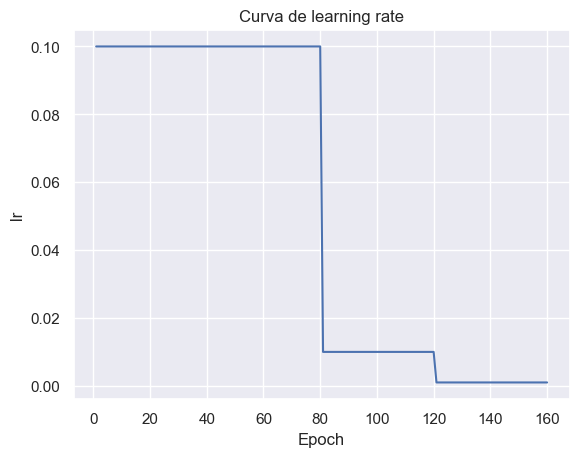

In [2]:
xs = [*range(1,161)]
ys = [lr_control({80: 0.1, 120: 0.01, 160: 0.001},x) for x in xs]

plt.figure()
plt.plot(xs, ys)
plt.title("Curva de learning rate")
plt.ylabel("lr")
plt.xlabel("Epoch")
plt.show()

# Experiments

## LMResNet-20

In [3]:
batch_size = 128
trainloader, testloader = get_cifar10(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
from torchinfo import summary
from blocks import BasicBlock
from MResNet import MResNet

In [5]:
net = MResNet(BasicBlock, [3,3,3], num_classes=10, stochastic_depth=False, pretrain=False)
net.cuda()
model_name = "MResNet20"

from pathlib import Path

p = Path(f"{model_name}.txt")
if p.exists():
    p.unlink()

summary(
    net,
    input_size=(batch_size, 3, 32, 32),
    col_names=[
        "input_size",
        "output_size",
        "num_params",
        "kernel_size",
        "mult_adds",
    ],
)

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
MResNet                                  [128, 3, 32, 32]          [128, 10]                 1,097                     --                        --
├─Conv2d: 1-1                            [128, 3, 32, 32]          [128, 16, 32, 32]         432                       [3, 3]                    56,623,104
├─ModuleList: 1-6                        --                        --                        (recursive)               --                        --
│    └─BasicBlock: 2-1                   [128, 16, 32, 32]         [128, 16, 32, 32]         --                        --                        --
│    │    └─BatchNorm2d: 3-1             [128, 16, 32, 32]         [128, 16, 32, 32]         32                        --                        4,096
│    │    └─ReLU: 3-2                    [128, 16, 32, 32]         [128, 16, 32, 32]         -

In [6]:
%%time
sgd_para = {"lr": 1e-3, "weight_decay": 0.0001, "momentum": 0.9}
lr_dict = {80: 0.1, 120: 0.01, 160: 0.001}

# Trainer = NN_SGDTrainer(net,sgd_para, trainloader, testloader, {200:1e-3}, model_name + '.txt')
Trainer = NN_SGDTrainer(
    net,
    sgd_para,
    trainloader,
    testloader,
    lr_dict,
    model_name + ".txt",
)

for i in range(160):  # 100
    Trainer.train()

391it [00:12, 30.84it/s]

Epoch 1 finished, average loss: 0.0111313307
Starting testing


Correct: 5947, total: 10000, accuracy: 0.5946999788, average loss: 0.0087860486


391it [00:12, 31.20it/s]

Epoch 2 finished, average loss: 0.0074984714
Starting testing


Correct: 6399, total: 10000, accuracy: 0.6398999691, average loss: 0.0083846036


391it [00:12, 30.88it/s]

Epoch 3 finished, average loss: 0.0062554587
Starting testing


Correct: 7194, total: 10000, accuracy: 0.7193999887, average loss: 0.0063002195


391it [00:12, 31.65it/s]

Epoch 4 finished, average loss: 0.0053040923
Starting testing


Correct: 7638, total: 10000, accuracy: 0.7637999654, average loss: 0.0053755148


391it [00:12, 31.29it/s]

Epoch 5 finished, average loss: 0.0047683544
Starting testing


Correct: 7808, total: 10000, accuracy: 0.7807999849, average loss: 0.0050434284


391it [00:12, 31.22it/s]

Epoch 6 finished, average loss: 0.0043662204
Starting testing


Correct: 7851, total: 10000, accuracy: 0.7850999832, average loss: 0.0049322284


391it [00:12, 31.64it/s]

Epoch 7 finished, average loss: 0.0040265155
Starting testing


Correct: 7969, total: 10000, accuracy: 0.7968999743, average loss: 0.0047444381


391it [00:12, 31.39it/s]

Epoch 8 finished, average loss: 0.0037736128
Starting testing


Correct: 7909, total: 10000, accuracy: 0.7908999920, average loss: 0.0048297094


391it [00:12, 31.58it/s]

Epoch 9 finished, average loss: 0.0036193307
Starting testing


Correct: 8195, total: 10000, accuracy: 0.8194999695, average loss: 0.0041998443


391it [00:12, 31.61it/s]

Epoch 10 finished, average loss: 0.0034509318
Starting testing


Correct: 8200, total: 10000, accuracy: 0.8199999928, average loss: 0.0042298350


391it [00:12, 31.34it/s]

Epoch 11 finished, average loss: 0.0033246091
Starting testing


Correct: 8268, total: 10000, accuracy: 0.8267999887, average loss: 0.0039619483


391it [00:12, 32.19it/s]

Epoch 12 finished, average loss: 0.0032312503
Starting testing


Correct: 7893, total: 10000, accuracy: 0.7892999649, average loss: 0.0052444429


391it [00:12, 31.87it/s]


Epoch 13 finished, average loss: 0.0030898004
Starting testing
Correct: 8274, total: 10000, accuracy: 0.8273999691, average loss: 0.0039834201


391it [00:12, 30.87it/s]

Epoch 14 finished, average loss: 0.0030174761
Starting testing


Correct: 8366, total: 10000, accuracy: 0.8366000056, average loss: 0.0038298717


391it [00:12, 31.80it/s]

Epoch 15 finished, average loss: 0.0028972793
Starting testing


Correct: 8295, total: 10000, accuracy: 0.8294999599, average loss: 0.0039578965


391it [00:12, 31.76it/s]

Epoch 16 finished, average loss: 0.0028251515
Starting testing


Correct: 8552, total: 10000, accuracy: 0.8551999927, average loss: 0.0033945638


391it [00:12, 31.36it/s]

Epoch 17 finished, average loss: 0.0027862250
Starting testing


Correct: 8238, total: 10000, accuracy: 0.8237999678, average loss: 0.0041242971


391it [00:12, 30.92it/s]

Epoch 18 finished, average loss: 0.0027152467
Starting testing


Correct: 8397, total: 10000, accuracy: 0.8396999836, average loss: 0.0036625941


391it [00:12, 31.20it/s]

Epoch 19 finished, average loss: 0.0026583954
Starting testing


Correct: 8183, total: 10000, accuracy: 0.8183000088, average loss: 0.0042512818


391it [00:12, 31.69it/s]

Epoch 20 finished, average loss: 0.0025968058
Starting testing


Correct: 8454, total: 10000, accuracy: 0.8453999758, average loss: 0.0035624749


391it [00:12, 32.13it/s]

Epoch 21 finished, average loss: 0.0025572810
Starting testing


Correct: 8546, total: 10000, accuracy: 0.8545999527, average loss: 0.0033762610


391it [00:12, 31.51it/s]

Epoch 22 finished, average loss: 0.0024820283
Starting testing


Correct: 8456, total: 10000, accuracy: 0.8455999494, average loss: 0.0036932384


391it [00:12, 31.32it/s]

Epoch 23 finished, average loss: 0.0024447499
Starting testing


Correct: 8289, total: 10000, accuracy: 0.8288999796, average loss: 0.0043971707


391it [00:12, 31.62it/s]

Epoch 24 finished, average loss: 0.0023950561
Starting testing


Correct: 8552, total: 10000, accuracy: 0.8551999927, average loss: 0.0033848485


391it [00:12, 31.81it/s]

Epoch 25 finished, average loss: 0.0023749871
Starting testing


Correct: 8556, total: 10000, accuracy: 0.8555999994, average loss: 0.0034211628


391it [00:12, 31.32it/s]

Epoch 26 finished, average loss: 0.0023559329
Starting testing


Correct: 8341, total: 10000, accuracy: 0.8341000080, average loss: 0.0039428889


391it [00:12, 31.30it/s]

Epoch 27 finished, average loss: 0.0023217356
Starting testing


Correct: 8349, total: 10000, accuracy: 0.8348999619, average loss: 0.0039940872


391it [00:12, 30.95it/s]

Epoch 28 finished, average loss: 0.0022786998
Starting testing


Correct: 8455, total: 10000, accuracy: 0.8454999924, average loss: 0.0037960549


391it [00:12, 31.14it/s]

Epoch 29 finished, average loss: 0.0022193520
Starting testing


Correct: 8502, total: 10000, accuracy: 0.8501999974, average loss: 0.0036409714


391it [00:12, 30.88it/s]

Epoch 30 finished, average loss: 0.0022235368
Starting testing


Correct: 8548, total: 10000, accuracy: 0.8547999859, average loss: 0.0035698546


391it [00:12, 31.77it/s]

Epoch 31 finished, average loss: 0.0021638761
Starting testing


Correct: 8563, total: 10000, accuracy: 0.8562999964, average loss: 0.0033453988


391it [00:12, 31.21it/s]

Epoch 32 finished, average loss: 0.0021480786
Starting testing


Correct: 8417, total: 10000, accuracy: 0.8416999578, average loss: 0.0038672169


391it [00:12, 31.19it/s]

Epoch 33 finished, average loss: 0.0021027090
Starting testing


Correct: 8640, total: 10000, accuracy: 0.8639999628, average loss: 0.0031746990


391it [00:12, 31.10it/s]

Epoch 34 finished, average loss: 0.0020674875
Starting testing


Correct: 8436, total: 10000, accuracy: 0.8435999751, average loss: 0.0037191946


391it [00:12, 31.30it/s]

Epoch 35 finished, average loss: 0.0020761281
Starting testing


Correct: 8559, total: 10000, accuracy: 0.8558999896, average loss: 0.0035661479


391it [00:12, 30.75it/s]

Epoch 36 finished, average loss: 0.0020733344
Starting testing


Correct: 8562, total: 10000, accuracy: 0.8561999798, average loss: 0.0033919403


391it [00:12, 31.12it/s]

Epoch 37 finished, average loss: 0.0020105309
Starting testing


Correct: 8562, total: 10000, accuracy: 0.8561999798, average loss: 0.0035488070


391it [00:12, 31.02it/s]

Epoch 38 finished, average loss: 0.0020472894
Starting testing


Correct: 8445, total: 10000, accuracy: 0.8445000052, average loss: 0.0038083187


391it [00:12, 31.49it/s]

Epoch 39 finished, average loss: 0.0020115195
Starting testing


Correct: 8748, total: 10000, accuracy: 0.8747999668, average loss: 0.0029982964


391it [00:12, 31.03it/s]

Epoch 40 finished, average loss: 0.0019601795
Starting testing


Correct: 8607, total: 10000, accuracy: 0.8606999516, average loss: 0.0034587528


391it [00:12, 30.54it/s]

Epoch 41 finished, average loss: 0.0019538199
Starting testing


Correct: 8540, total: 10000, accuracy: 0.8539999723, average loss: 0.0036291280


391it [00:12, 30.71it/s]

Epoch 42 finished, average loss: 0.0019357433
Starting testing


Correct: 8579, total: 10000, accuracy: 0.8578999639, average loss: 0.0034666829


391it [00:12, 30.31it/s]

Epoch 43 finished, average loss: 0.0019377461
Starting testing


Correct: 8692, total: 10000, accuracy: 0.8691999912, average loss: 0.0033259866


391it [00:12, 30.67it/s]

Epoch 44 finished, average loss: 0.0019231764
Starting testing


Correct: 8657, total: 10000, accuracy: 0.8657000065, average loss: 0.0032129054


391it [00:13, 29.65it/s]

Epoch 45 finished, average loss: 0.0018739055
Starting testing


Correct: 8681, total: 10000, accuracy: 0.8680999875, average loss: 0.0032566257


391it [00:12, 31.12it/s]

Epoch 46 finished, average loss: 0.0018942579
Starting testing


Correct: 8700, total: 10000, accuracy: 0.8700000048, average loss: 0.0031007199


391it [00:12, 31.37it/s]

Epoch 47 finished, average loss: 0.0018992343
Starting testing


Correct: 8593, total: 10000, accuracy: 0.8592999578, average loss: 0.0033545920


391it [00:12, 31.21it/s]

Epoch 48 finished, average loss: 0.0018533680
Starting testing


Correct: 8513, total: 10000, accuracy: 0.8513000011, average loss: 0.0036047909


391it [00:12, 31.44it/s]

Epoch 49 finished, average loss: 0.0018532942
Starting testing


Correct: 8567, total: 10000, accuracy: 0.8567000031, average loss: 0.0033807386


391it [00:12, 30.91it/s]

Epoch 50 finished, average loss: 0.0018854400
Starting testing


Correct: 8511, total: 10000, accuracy: 0.8510999680, average loss: 0.0035922685


391it [00:12, 31.23it/s]

Epoch 51 finished, average loss: 0.0018178271
Starting testing


Correct: 8747, total: 10000, accuracy: 0.8746999502, average loss: 0.0030839432


391it [00:12, 31.03it/s]

Epoch 52 finished, average loss: 0.0018246672
Starting testing


Correct: 8729, total: 10000, accuracy: 0.8728999496, average loss: 0.0031232495


391it [00:12, 31.01it/s]

Epoch 53 finished, average loss: 0.0017912754
Starting testing


Correct: 8479, total: 10000, accuracy: 0.8478999734, average loss: 0.0038522723


391it [00:12, 31.52it/s]

Epoch 54 finished, average loss: 0.0018035991
Starting testing


Correct: 8603, total: 10000, accuracy: 0.8603000045, average loss: 0.0035299471


391it [00:12, 31.28it/s]

Epoch 55 finished, average loss: 0.0017923160
Starting testing


Correct: 8439, total: 10000, accuracy: 0.8438999653, average loss: 0.0039497699


391it [00:12, 31.46it/s]

Epoch 56 finished, average loss: 0.0018179852
Starting testing


Correct: 8699, total: 10000, accuracy: 0.8698999882, average loss: 0.0031083877


391it [00:12, 31.21it/s]

Epoch 57 finished, average loss: 0.0017698809
Starting testing


Correct: 8670, total: 10000, accuracy: 0.8669999838, average loss: 0.0032128580


391it [00:12, 31.00it/s]

Epoch 58 finished, average loss: 0.0017724571
Starting testing


Correct: 8519, total: 10000, accuracy: 0.8518999815, average loss: 0.0035906376


391it [00:12, 30.83it/s]

Epoch 59 finished, average loss: 0.0017778892
Starting testing


Correct: 8703, total: 10000, accuracy: 0.8702999949, average loss: 0.0031754008


391it [00:12, 31.27it/s]

Epoch 60 finished, average loss: 0.0017482505
Starting testing


Correct: 8856, total: 10000, accuracy: 0.8855999708, average loss: 0.0027365769


391it [00:12, 30.83it/s]

Epoch 61 finished, average loss: 0.0016976156
Starting testing


Correct: 8628, total: 10000, accuracy: 0.8628000021, average loss: 0.0033524573


391it [00:12, 31.22it/s]

Epoch 62 finished, average loss: 0.0017577822
Starting testing


Correct: 8638, total: 10000, accuracy: 0.8637999892, average loss: 0.0033061385


391it [00:12, 31.21it/s]

Epoch 63 finished, average loss: 0.0017132397
Starting testing


Correct: 8288, total: 10000, accuracy: 0.8287999630, average loss: 0.0042731116


391it [00:12, 31.63it/s]

Epoch 64 finished, average loss: 0.0016859406
Starting testing


Correct: 8500, total: 10000, accuracy: 0.8499999642, average loss: 0.0039299813


391it [00:12, 30.93it/s]

Epoch 65 finished, average loss: 0.0017014543
Starting testing


Correct: 8624, total: 10000, accuracy: 0.8623999953, average loss: 0.0033300692


391it [00:12, 31.50it/s]

Epoch 66 finished, average loss: 0.0016913269
Starting testing


Correct: 8594, total: 10000, accuracy: 0.8593999743, average loss: 0.0034717288


391it [00:12, 30.71it/s]

Epoch 67 finished, average loss: 0.0016570648
Starting testing


Correct: 8774, total: 10000, accuracy: 0.8773999810, average loss: 0.0029800609


391it [00:12, 31.52it/s]

Epoch 68 finished, average loss: 0.0016777411
Starting testing


Correct: 8567, total: 10000, accuracy: 0.8567000031, average loss: 0.0036232891


391it [00:12, 31.07it/s]

Epoch 69 finished, average loss: 0.0016736923
Starting testing


Correct: 8587, total: 10000, accuracy: 0.8586999774, average loss: 0.0033591863


391it [00:12, 31.66it/s]

Epoch 70 finished, average loss: 0.0016697566
Starting testing


Correct: 8484, total: 10000, accuracy: 0.8483999968, average loss: 0.0039639085


391it [00:12, 31.83it/s]

Epoch 71 finished, average loss: 0.0016427230
Starting testing


Correct: 8770, total: 10000, accuracy: 0.8769999743, average loss: 0.0029769183


391it [00:12, 31.88it/s]

Epoch 72 finished, average loss: 0.0016366447
Starting testing


Correct: 8651, total: 10000, accuracy: 0.8650999665, average loss: 0.0033492340


391it [00:12, 31.56it/s]

Epoch 73 finished, average loss: 0.0016432356
Starting testing


Correct: 8721, total: 10000, accuracy: 0.8720999956, average loss: 0.0032182610


391it [00:12, 31.99it/s]

Epoch 74 finished, average loss: 0.0016279200
Starting testing


Correct: 8660, total: 10000, accuracy: 0.8659999967, average loss: 0.0032382037


391it [00:12, 31.68it/s]

Epoch 75 finished, average loss: 0.0016165162
Starting testing


Correct: 8768, total: 10000, accuracy: 0.8768000007, average loss: 0.0030827439


391it [00:12, 31.61it/s]

Epoch 76 finished, average loss: 0.0016528717
Starting testing


Correct: 8813, total: 10000, accuracy: 0.8812999725, average loss: 0.0028291649


391it [00:12, 31.34it/s]

Epoch 77 finished, average loss: 0.0015798976
Starting testing


Correct: 8626, total: 10000, accuracy: 0.8625999689, average loss: 0.0033175787


391it [00:12, 31.35it/s]

Epoch 78 finished, average loss: 0.0016369383
Starting testing


Correct: 8796, total: 10000, accuracy: 0.8795999885, average loss: 0.0028302187


391it [00:12, 31.57it/s]

Epoch 79 finished, average loss: 0.0016269052
Starting testing


Correct: 8674, total: 10000, accuracy: 0.8673999906, average loss: 0.0033166126


391it [00:12, 31.61it/s]

Epoch 80 finished, average loss: 0.0016033924
Starting testing


Correct: 8621, total: 10000, accuracy: 0.8621000051, average loss: 0.0034750375


391it [00:12, 31.25it/s]

Epoch 81 finished, average loss: 0.0009843421
Starting testing


Correct: 9122, total: 10000, accuracy: 0.9121999741, average loss: 0.0021393293


391it [00:12, 31.58it/s]

Epoch 82 finished, average loss: 0.0007687184
Starting testing


Correct: 9145, total: 10000, accuracy: 0.9144999981, average loss: 0.0021242795


391it [00:12, 31.43it/s]

Epoch 83 finished, average loss: 0.0006632277
Starting testing


Correct: 9153, total: 10000, accuracy: 0.9152999520, average loss: 0.0020941275


391it [00:12, 31.64it/s]


Epoch 84 finished, average loss: 0.0006235603
Starting testing
Correct: 9161, total: 10000, accuracy: 0.9160999656, average loss: 0.0021425817


391it [00:12, 31.58it/s]

Epoch 85 finished, average loss: 0.0006037995
Starting testing


Correct: 9170, total: 10000, accuracy: 0.9169999957, average loss: 0.0021174115


391it [00:12, 31.88it/s]

Epoch 86 finished, average loss: 0.0005595222
Starting testing


Correct: 9197, total: 10000, accuracy: 0.9196999669, average loss: 0.0021365774


391it [00:12, 31.28it/s]

Epoch 87 finished, average loss: 0.0005253343
Starting testing


Correct: 9158, total: 10000, accuracy: 0.9157999754, average loss: 0.0022224132


391it [00:12, 31.20it/s]

Epoch 88 finished, average loss: 0.0005070480
Starting testing


Correct: 9166, total: 10000, accuracy: 0.9165999889, average loss: 0.0021886074


391it [00:12, 31.51it/s]

Epoch 89 finished, average loss: 0.0004588665
Starting testing


Correct: 9169, total: 10000, accuracy: 0.9168999791, average loss: 0.0021792780


391it [00:12, 31.82it/s]

Epoch 90 finished, average loss: 0.0004658454
Starting testing


Correct: 9176, total: 10000, accuracy: 0.9175999761, average loss: 0.0022152815


391it [00:12, 31.39it/s]

Epoch 91 finished, average loss: 0.0004287755
Starting testing


Correct: 9155, total: 10000, accuracy: 0.9154999852, average loss: 0.0022821966


391it [00:12, 31.57it/s]

Epoch 92 finished, average loss: 0.0004308144
Starting testing


Correct: 9160, total: 10000, accuracy: 0.9159999490, average loss: 0.0022689492


391it [00:12, 31.49it/s]

Epoch 93 finished, average loss: 0.0004071170
Starting testing


Correct: 9158, total: 10000, accuracy: 0.9157999754, average loss: 0.0022864274


391it [00:12, 31.16it/s]

Epoch 94 finished, average loss: 0.0003920018
Starting testing


Correct: 9142, total: 10000, accuracy: 0.9141999483, average loss: 0.0023003438


391it [00:12, 31.87it/s]

Epoch 95 finished, average loss: 0.0003898132
Starting testing


Correct: 9176, total: 10000, accuracy: 0.9175999761, average loss: 0.0023060046


391it [00:12, 31.87it/s]

Epoch 96 finished, average loss: 0.0003634229
Starting testing


Correct: 9163, total: 10000, accuracy: 0.9162999988, average loss: 0.0023330788


391it [00:12, 31.20it/s]

Epoch 97 finished, average loss: 0.0003573029
Starting testing


Correct: 9177, total: 10000, accuracy: 0.9176999927, average loss: 0.0023332511


391it [00:12, 31.67it/s]

Epoch 98 finished, average loss: 0.0003466597
Starting testing


Correct: 9181, total: 10000, accuracy: 0.9180999994, average loss: 0.0023891926


391it [00:12, 31.34it/s]

Epoch 99 finished, average loss: 0.0003276958
Starting testing


Correct: 9190, total: 10000, accuracy: 0.9189999700, average loss: 0.0023956614


391it [00:12, 31.53it/s]

Epoch 100 finished, average loss: 0.0003140690
Starting testing


Correct: 9166, total: 10000, accuracy: 0.9165999889, average loss: 0.0024587909


391it [00:12, 31.37it/s]

Epoch 101 finished, average loss: 0.0003119336
Starting testing


Correct: 9158, total: 10000, accuracy: 0.9157999754, average loss: 0.0024368293


391it [00:12, 31.57it/s]

Epoch 102 finished, average loss: 0.0003107243
Starting testing


Correct: 9160, total: 10000, accuracy: 0.9159999490, average loss: 0.0024288249


391it [00:12, 32.01it/s]

Epoch 103 finished, average loss: 0.0002870963
Starting testing


Correct: 9178, total: 10000, accuracy: 0.9177999496, average loss: 0.0024370682


391it [00:12, 31.87it/s]

Epoch 104 finished, average loss: 0.0002861900
Starting testing


Correct: 9150, total: 10000, accuracy: 0.9149999619, average loss: 0.0024479302


391it [00:12, 31.43it/s]

Epoch 105 finished, average loss: 0.0002819499
Starting testing


Correct: 9161, total: 10000, accuracy: 0.9160999656, average loss: 0.0024892758


391it [00:12, 31.32it/s]

Epoch 106 finished, average loss: 0.0002724680
Starting testing


Correct: 9163, total: 10000, accuracy: 0.9162999988, average loss: 0.0025102034


391it [00:12, 32.22it/s]

Epoch 107 finished, average loss: 0.0002654923
Starting testing


Correct: 9166, total: 10000, accuracy: 0.9165999889, average loss: 0.0024911881


391it [00:12, 32.22it/s]

Epoch 108 finished, average loss: 0.0002621292
Starting testing


Correct: 9162, total: 10000, accuracy: 0.9161999822, average loss: 0.0025213629


391it [00:12, 31.77it/s]

Epoch 109 finished, average loss: 0.0002491182
Starting testing


Correct: 9144, total: 10000, accuracy: 0.9143999815, average loss: 0.0026143969


391it [00:12, 31.52it/s]

Epoch 110 finished, average loss: 0.0002529262
Starting testing


Correct: 9145, total: 10000, accuracy: 0.9144999981, average loss: 0.0025466430


391it [00:12, 32.02it/s]


Epoch 111 finished, average loss: 0.0002325790
Starting testing
Correct: 9163, total: 10000, accuracy: 0.9162999988, average loss: 0.0025817830


391it [00:12, 31.84it/s]

Epoch 112 finished, average loss: 0.0002483906
Starting testing


Correct: 9136, total: 10000, accuracy: 0.9135999680, average loss: 0.0026067577


391it [00:12, 31.89it/s]

Epoch 113 finished, average loss: 0.0002336013
Starting testing


Correct: 9131, total: 10000, accuracy: 0.9131000042, average loss: 0.0027502583


391it [00:12, 32.11it/s]

Epoch 114 finished, average loss: 0.0002218292
Starting testing


Correct: 9174, total: 10000, accuracy: 0.9174000025, average loss: 0.0025860218


391it [00:12, 31.57it/s]

Epoch 115 finished, average loss: 0.0002203821
Starting testing


Correct: 9176, total: 10000, accuracy: 0.9175999761, average loss: 0.0026207611


391it [00:12, 32.04it/s]

Epoch 116 finished, average loss: 0.0002178473
Starting testing


Correct: 9169, total: 10000, accuracy: 0.9168999791, average loss: 0.0026289047


391it [00:12, 31.40it/s]

Epoch 117 finished, average loss: 0.0002184550
Starting testing


Correct: 9185, total: 10000, accuracy: 0.9185000062, average loss: 0.0025821856


391it [00:12, 31.71it/s]

Epoch 118 finished, average loss: 0.0002213727
Starting testing


Correct: 9154, total: 10000, accuracy: 0.9153999686, average loss: 0.0027343423


391it [00:12, 31.56it/s]

Epoch 119 finished, average loss: 0.0002208966
Starting testing


Correct: 9173, total: 10000, accuracy: 0.9172999859, average loss: 0.0026125163


391it [00:12, 32.17it/s]

Epoch 120 finished, average loss: 0.0002008023
Starting testing


Correct: 9158, total: 10000, accuracy: 0.9157999754, average loss: 0.0026629864


391it [00:12, 31.64it/s]

Epoch 121 finished, average loss: 0.0001751579
Starting testing


Correct: 9173, total: 10000, accuracy: 0.9172999859, average loss: 0.0026059062


391it [00:12, 31.53it/s]

Epoch 122 finished, average loss: 0.0001568386
Starting testing


Correct: 9179, total: 10000, accuracy: 0.9178999662, average loss: 0.0026235165


391it [00:12, 32.13it/s]

Epoch 123 finished, average loss: 0.0001564110
Starting testing


Correct: 9182, total: 10000, accuracy: 0.9181999564, average loss: 0.0025982594


391it [00:12, 31.52it/s]

Epoch 124 finished, average loss: 0.0001555573
Starting testing


Correct: 9182, total: 10000, accuracy: 0.9181999564, average loss: 0.0026070138


391it [00:12, 31.85it/s]

Epoch 125 finished, average loss: 0.0001579338
Starting testing


Correct: 9180, total: 10000, accuracy: 0.9179999828, average loss: 0.0025894193


391it [00:12, 32.08it/s]

Epoch 126 finished, average loss: 0.0001552467
Starting testing


Correct: 9170, total: 10000, accuracy: 0.9169999957, average loss: 0.0025945454


391it [00:12, 31.28it/s]

Epoch 127 finished, average loss: 0.0001484686
Starting testing


Correct: 9178, total: 10000, accuracy: 0.9177999496, average loss: 0.0026043253


391it [00:12, 31.47it/s]

Epoch 128 finished, average loss: 0.0001423032
Starting testing


Correct: 9189, total: 10000, accuracy: 0.9188999534, average loss: 0.0026014056


391it [00:12, 31.50it/s]

Epoch 129 finished, average loss: 0.0001425026
Starting testing


Correct: 9191, total: 10000, accuracy: 0.9190999866, average loss: 0.0025959620


391it [00:12, 31.45it/s]

Epoch 130 finished, average loss: 0.0001334980
Starting testing


Correct: 9170, total: 10000, accuracy: 0.9169999957, average loss: 0.0025896703


391it [00:12, 32.01it/s]

Epoch 131 finished, average loss: 0.0001405065
Starting testing


Correct: 9181, total: 10000, accuracy: 0.9180999994, average loss: 0.0025880885


391it [00:12, 31.49it/s]

Epoch 132 finished, average loss: 0.0001377121
Starting testing


Correct: 9181, total: 10000, accuracy: 0.9180999994, average loss: 0.0025982013


391it [00:12, 31.60it/s]

Epoch 133 finished, average loss: 0.0001299758
Starting testing


Correct: 9189, total: 10000, accuracy: 0.9188999534, average loss: 0.0025974885


391it [00:12, 32.18it/s]

Epoch 134 finished, average loss: 0.0001374256
Starting testing


Correct: 9181, total: 10000, accuracy: 0.9180999994, average loss: 0.0026090726


391it [00:12, 31.31it/s]

Epoch 135 finished, average loss: 0.0001294932
Starting testing


Correct: 9182, total: 10000, accuracy: 0.9181999564, average loss: 0.0026347703


391it [00:12, 31.70it/s]

Epoch 136 finished, average loss: 0.0001349231
Starting testing


Correct: 9177, total: 10000, accuracy: 0.9176999927, average loss: 0.0026320760


391it [00:12, 31.53it/s]

Epoch 137 finished, average loss: 0.0001330007
Starting testing


Correct: 9177, total: 10000, accuracy: 0.9176999927, average loss: 0.0026324145


391it [00:12, 31.46it/s]

Epoch 138 finished, average loss: 0.0001350277
Starting testing


Correct: 9174, total: 10000, accuracy: 0.9174000025, average loss: 0.0026284727


391it [00:12, 31.44it/s]

Epoch 139 finished, average loss: 0.0001283737
Starting testing


Correct: 9187, total: 10000, accuracy: 0.9186999798, average loss: 0.0026385045


391it [00:12, 31.67it/s]

Epoch 140 finished, average loss: 0.0001288945
Starting testing


Correct: 9188, total: 10000, accuracy: 0.9187999964, average loss: 0.0026240429


391it [00:12, 31.34it/s]

Epoch 141 finished, average loss: 0.0001322407
Starting testing


Correct: 9171, total: 10000, accuracy: 0.9170999527, average loss: 0.0026571977


391it [00:12, 31.87it/s]

Epoch 142 finished, average loss: 0.0001226776
Starting testing


Correct: 9182, total: 10000, accuracy: 0.9181999564, average loss: 0.0026552209


391it [00:12, 31.68it/s]

Epoch 143 finished, average loss: 0.0001265564
Starting testing


Correct: 9196, total: 10000, accuracy: 0.9195999503, average loss: 0.0026106369


391it [00:12, 31.89it/s]

Epoch 144 finished, average loss: 0.0001223657
Starting testing


Correct: 9179, total: 10000, accuracy: 0.9178999662, average loss: 0.0026356234


391it [00:12, 31.72it/s]

Epoch 145 finished, average loss: 0.0001261883
Starting testing


Correct: 9177, total: 10000, accuracy: 0.9176999927, average loss: 0.0026371496


391it [00:12, 31.14it/s]

Epoch 146 finished, average loss: 0.0001265642
Starting testing


Correct: 9184, total: 10000, accuracy: 0.9183999896, average loss: 0.0026215696


391it [00:12, 31.44it/s]

Epoch 147 finished, average loss: 0.0001213927
Starting testing


Correct: 9189, total: 10000, accuracy: 0.9188999534, average loss: 0.0026314723


391it [00:12, 31.65it/s]

Epoch 148 finished, average loss: 0.0001248041
Starting testing


Correct: 9189, total: 10000, accuracy: 0.9188999534, average loss: 0.0026474365


391it [00:12, 31.55it/s]

Epoch 149 finished, average loss: 0.0001211458
Starting testing


Correct: 9178, total: 10000, accuracy: 0.9177999496, average loss: 0.0026590385


391it [00:12, 30.88it/s]

Epoch 150 finished, average loss: 0.0001180073
Starting testing


Correct: 9194, total: 10000, accuracy: 0.9193999767, average loss: 0.0026245295


391it [00:12, 31.95it/s]

Epoch 151 finished, average loss: 0.0001186872
Starting testing


Correct: 9190, total: 10000, accuracy: 0.9189999700, average loss: 0.0026445353


391it [00:12, 31.43it/s]

Epoch 152 finished, average loss: 0.0001201676
Starting testing


Correct: 9186, total: 10000, accuracy: 0.9185999632, average loss: 0.0026550009


391it [00:12, 31.48it/s]

Epoch 153 finished, average loss: 0.0001253983
Starting testing


Correct: 9185, total: 10000, accuracy: 0.9185000062, average loss: 0.0026469980


391it [00:12, 31.27it/s]

Epoch 154 finished, average loss: 0.0001224672
Starting testing


Correct: 9188, total: 10000, accuracy: 0.9187999964, average loss: 0.0026493170


391it [00:12, 31.86it/s]

Epoch 155 finished, average loss: 0.0001200380
Starting testing


Correct: 9196, total: 10000, accuracy: 0.9195999503, average loss: 0.0026560673


391it [00:12, 31.63it/s]

Epoch 156 finished, average loss: 0.0001106034
Starting testing


Correct: 9187, total: 10000, accuracy: 0.9186999798, average loss: 0.0026530748


391it [00:12, 31.44it/s]

Epoch 157 finished, average loss: 0.0001145576
Starting testing


Correct: 9188, total: 10000, accuracy: 0.9187999964, average loss: 0.0026361427


391it [00:12, 31.09it/s]

Epoch 158 finished, average loss: 0.0001161480
Starting testing


Correct: 9191, total: 10000, accuracy: 0.9190999866, average loss: 0.0026225904


391it [00:12, 31.59it/s]

Epoch 159 finished, average loss: 0.0001196620
Starting testing


Correct: 9191, total: 10000, accuracy: 0.9190999866, average loss: 0.0026397236


391it [00:12, 31.62it/s]

Epoch 160 finished, average loss: 0.0001186993
Starting testing


Correct: 9200, total: 10000, accuracy: 0.9199999571, average loss: 0.0026406551
CPU times: user 30min 1s, sys: 1min 27s, total: 31min 29s
Wall time: 36min 38s


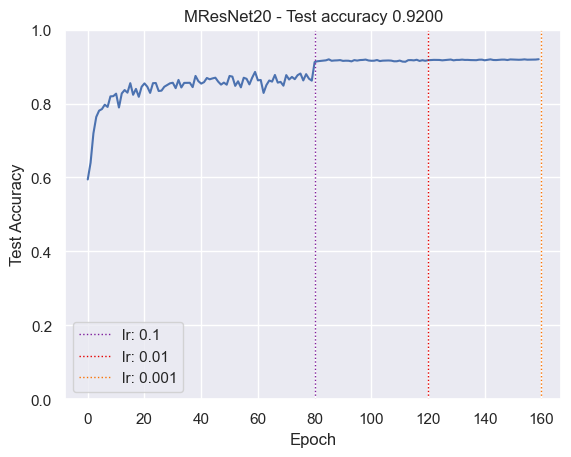

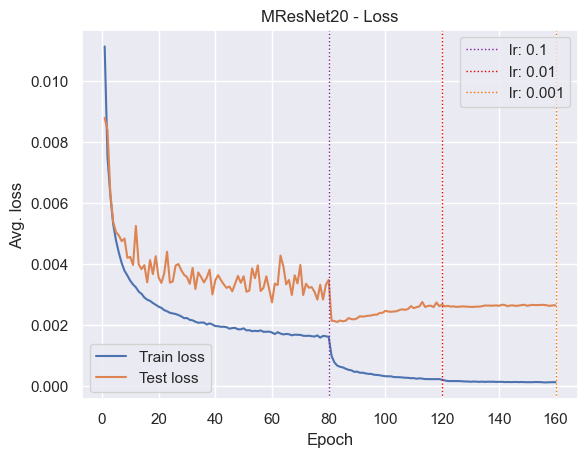

In [7]:
with open(p) as f:
    lines = f.read()

data = re.findall(
    r"Epoch (\d+) finished, average loss: (\d+\.\d+)\n[\d\- :\.]*\nStarting testing\n[\d\- :\.]*\nCorrect: \d+, total: \d+, accuracy: (\d+\.\d+), average loss: (\d+\.\d+)",
    lines,
    re.MULTILINE,
)
# print(len(data))
# print(data)
epochs = [int(x[0]) for x in data]
losses = [float(x[1]) for x in data]
accuracies = [float(x[2]) for x in data]
test_losses = [float(x[3]) for x in data]

results_mresnet20 = dict(epochs=epochs, losses=losses, accuracies=accuracies, test_losses=test_losses)

fix, ax = plt.subplots()
ax.plot(accuracies)
ax.set_ylim(0, 1)
plt.title(f"{model_name} - Test accuracy {accuracies[-1]:.4f}")
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
cmap = plt.get_cmap("Pastel1")

for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    
plt.legend()
plt.show()

fix, ax = plt.subplots()
train_loss, = ax.plot(epochs, losses, label="Train loss")
test_loss, = ax.plot(epochs, test_losses, label="Test loss")
plt.title(f"{model_name} - Loss")
plt.ylabel("Avg. loss")
plt.xlabel("Epoch")
first_legend = plt.legend(handles=[train_loss, test_loss])

ax = plt.gca().add_artist(first_legend)

lrhs = []
for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    lr_h = plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    lrhs.append(lr_h)

plt.legend(handles=lrhs)
plt.show()

In [8]:
with open(f"{model_name}_ks.txt", "w") as f:
    for i, x in enumerate(net.ks, start=1):
        f.write(f"{i},{x.item()}\n") 

## LMResNet-32

In [9]:
batch_size = 128
trainloader, testloader = get_cifar10(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [10]:
from torchinfo import summary
from blocks import BasicBlock
from MResNet import MResNet

In [11]:
net = MResNet(BasicBlock, [5,5,5], num_classes=10, stochastic_depth=False, pretrain=False)
net.cuda()
model_name = "MResNet32"

from pathlib import Path

p = Path(f"{model_name}.txt")
if p.exists():
    p.unlink()

summary(
    net,
    input_size=(batch_size, 3, 32, 32),
    col_names=[
        "input_size",
        "output_size",
        "num_params",
        "kernel_size",
        "mult_adds",
    ],
)

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
MResNet                                  [128, 3, 32, 32]          [128, 10]                 1,103                     --                        --
├─Conv2d: 1-1                            [128, 3, 32, 32]          [128, 16, 32, 32]         432                       [3, 3]                    56,623,104
├─ModuleList: 1-6                        --                        --                        (recursive)               --                        --
│    └─BasicBlock: 2-1                   [128, 16, 32, 32]         [128, 16, 32, 32]         --                        --                        --
│    │    └─BatchNorm2d: 3-1             [128, 16, 32, 32]         [128, 16, 32, 32]         32                        --                        4,096
│    │    └─ReLU: 3-2                    [128, 16, 32, 32]         [128, 16, 32, 32]         -

In [12]:
%%time
sgd_para = {"lr": 1e-3, "weight_decay": 0.0001, "momentum": 0.9}
lr_dict = {80: 0.1, 120: 0.01, 160: 0.001}

# Trainer = NN_SGDTrainer(net,sgd_para, trainloader, testloader, {200:1e-3}, model_name + '.txt')
Trainer = NN_SGDTrainer(
    net,
    sgd_para,
    trainloader,
    testloader,
    lr_dict,
    model_name + ".txt",
)

for i in range(160):  # 100
    Trainer.train()

391it [00:17, 21.94it/s]

Epoch 1 finished, average loss: 0.0118259005
Starting testing


Correct: 5450, total: 10000, accuracy: 0.5449999571, average loss: 0.0102311044


391it [00:17, 21.95it/s]

Epoch 2 finished, average loss: 0.0075976536
Starting testing


Correct: 6554, total: 10000, accuracy: 0.6553999782, average loss: 0.0077421603


391it [00:17, 21.92it/s]

Epoch 3 finished, average loss: 0.0059611941
Starting testing


Correct: 7354, total: 10000, accuracy: 0.7353999615, average loss: 0.0061091893


391it [00:17, 21.75it/s]


Epoch 4 finished, average loss: 0.0050745992
Starting testing
Correct: 7577, total: 10000, accuracy: 0.7576999664, average loss: 0.0055364876


391it [00:17, 21.87it/s]

Epoch 5 finished, average loss: 0.0045885452
Starting testing


Correct: 7551, total: 10000, accuracy: 0.7550999522, average loss: 0.0058393727


391it [00:17, 21.88it/s]

Epoch 6 finished, average loss: 0.0041674649
Starting testing


Correct: 7730, total: 10000, accuracy: 0.7730000019, average loss: 0.0052908818


391it [00:17, 21.90it/s]

Epoch 7 finished, average loss: 0.0038480709
Starting testing


Correct: 7915, total: 10000, accuracy: 0.7914999723, average loss: 0.0049341715


391it [00:17, 21.93it/s]

Epoch 8 finished, average loss: 0.0036688229
Starting testing


Correct: 8203, total: 10000, accuracy: 0.8202999830, average loss: 0.0041701700


391it [00:17, 21.92it/s]

Epoch 9 finished, average loss: 0.0034320989
Starting testing


Correct: 7719, total: 10000, accuracy: 0.7718999982, average loss: 0.0054153654


391it [00:17, 21.91it/s]

Epoch 10 finished, average loss: 0.0032877850
Starting testing


Correct: 8243, total: 10000, accuracy: 0.8242999911, average loss: 0.0041798013


391it [00:17, 21.92it/s]

Epoch 11 finished, average loss: 0.0031645558
Starting testing


Correct: 7939, total: 10000, accuracy: 0.7938999534, average loss: 0.0048278142


391it [00:17, 21.85it/s]

Epoch 12 finished, average loss: 0.0030466316
Starting testing


Correct: 8457, total: 10000, accuracy: 0.8456999660, average loss: 0.0035965341


391it [00:17, 21.87it/s]

Epoch 13 finished, average loss: 0.0029495724
Starting testing


Correct: 8309, total: 10000, accuracy: 0.8308999538, average loss: 0.0040639612


391it [00:17, 21.86it/s]

Epoch 14 finished, average loss: 0.0028061223
Starting testing


Correct: 8311, total: 10000, accuracy: 0.8310999870, average loss: 0.0039942650


391it [00:17, 21.78it/s]

Epoch 15 finished, average loss: 0.0027471751
Starting testing


Correct: 8325, total: 10000, accuracy: 0.8324999809, average loss: 0.0038673508


391it [00:17, 21.80it/s]

Epoch 16 finished, average loss: 0.0026607241
Starting testing


Correct: 8457, total: 10000, accuracy: 0.8456999660, average loss: 0.0035453823


391it [00:17, 22.63it/s]

Epoch 17 finished, average loss: 0.0026248635
Starting testing


Correct: 8651, total: 10000, accuracy: 0.8650999665, average loss: 0.0031492544


391it [00:15, 25.21it/s]

Epoch 18 finished, average loss: 0.0025130242
Starting testing


Correct: 8547, total: 10000, accuracy: 0.8546999693, average loss: 0.0034822209


391it [00:15, 25.20it/s]

Epoch 19 finished, average loss: 0.0024803299
Starting testing


Correct: 8497, total: 10000, accuracy: 0.8496999741, average loss: 0.0034296313


391it [00:15, 25.24it/s]

Epoch 20 finished, average loss: 0.0024639701
Starting testing


Correct: 8320, total: 10000, accuracy: 0.8319999576, average loss: 0.0040040796


391it [00:15, 25.27it/s]

Epoch 21 finished, average loss: 0.0024002123
Starting testing


Correct: 8570, total: 10000, accuracy: 0.8569999933, average loss: 0.0033623783


391it [00:15, 25.33it/s]

Epoch 22 finished, average loss: 0.0023330692
Starting testing


Correct: 8721, total: 10000, accuracy: 0.8720999956, average loss: 0.0031046038


391it [00:15, 25.31it/s]

Epoch 23 finished, average loss: 0.0022684431
Starting testing


Correct: 8410, total: 10000, accuracy: 0.8409999609, average loss: 0.0037818779


391it [00:15, 25.19it/s]

Epoch 24 finished, average loss: 0.0022350419
Starting testing


Correct: 8673, total: 10000, accuracy: 0.8672999740, average loss: 0.0032039858


391it [00:15, 25.15it/s]

Epoch 25 finished, average loss: 0.0021953223
Starting testing


Correct: 8223, total: 10000, accuracy: 0.8222999573, average loss: 0.0044918557


391it [00:15, 25.14it/s]

Epoch 26 finished, average loss: 0.0021809221
Starting testing


Correct: 8690, total: 10000, accuracy: 0.8689999580, average loss: 0.0030817741


391it [00:16, 24.40it/s]

Epoch 27 finished, average loss: 0.0020934988
Starting testing


Correct: 8621, total: 10000, accuracy: 0.8621000051, average loss: 0.0034133026


391it [00:16, 24.02it/s]

Epoch 28 finished, average loss: 0.0021024360
Starting testing


Correct: 8581, total: 10000, accuracy: 0.8580999970, average loss: 0.0033345106


391it [00:16, 24.06it/s]

Epoch 29 finished, average loss: 0.0020485963
Starting testing


Correct: 8406, total: 10000, accuracy: 0.8405999541, average loss: 0.0040039622


391it [00:16, 24.15it/s]

Epoch 30 finished, average loss: 0.0020264269
Starting testing


Correct: 8348, total: 10000, accuracy: 0.8348000050, average loss: 0.0043772416


391it [00:16, 24.06it/s]

Epoch 31 finished, average loss: 0.0020468035
Starting testing


Correct: 8718, total: 10000, accuracy: 0.8718000054, average loss: 0.0031846581


391it [00:16, 24.11it/s]

Epoch 32 finished, average loss: 0.0019845938
Starting testing


Correct: 8647, total: 10000, accuracy: 0.8646999598, average loss: 0.0033208845


391it [00:16, 24.04it/s]

Epoch 33 finished, average loss: 0.0019236170
Starting testing


Correct: 8529, total: 10000, accuracy: 0.8528999686, average loss: 0.0034158417


391it [00:16, 24.04it/s]

Epoch 34 finished, average loss: 0.0018912535
Starting testing


Correct: 8589, total: 10000, accuracy: 0.8588999510, average loss: 0.0034762643


391it [00:16, 24.05it/s]

Epoch 35 finished, average loss: 0.0018690975
Starting testing


Correct: 8422, total: 10000, accuracy: 0.8421999812, average loss: 0.0039606918


391it [00:16, 24.05it/s]

Epoch 36 finished, average loss: 0.0018988398
Starting testing


Correct: 8421, total: 10000, accuracy: 0.8420999646, average loss: 0.0039271879


391it [00:16, 24.12it/s]

Epoch 37 finished, average loss: 0.0018582310
Starting testing


Correct: 8303, total: 10000, accuracy: 0.8302999735, average loss: 0.0043286224


391it [00:16, 24.14it/s]

Epoch 38 finished, average loss: 0.0018335784
Starting testing


Correct: 8704, total: 10000, accuracy: 0.8703999519, average loss: 0.0031474739


391it [00:16, 24.14it/s]


Epoch 39 finished, average loss: 0.0017998378
Starting testing
Correct: 8468, total: 10000, accuracy: 0.8467999697, average loss: 0.0039524165


391it [00:16, 24.06it/s]


Epoch 40 finished, average loss: 0.0018125070
Starting testing
Correct: 8649, total: 10000, accuracy: 0.8648999929, average loss: 0.0032822344


391it [00:16, 24.14it/s]

Epoch 41 finished, average loss: 0.0017463583
Starting testing


Correct: 8674, total: 10000, accuracy: 0.8673999906, average loss: 0.0031930093


391it [00:16, 24.06it/s]

Epoch 42 finished, average loss: 0.0017821813
Starting testing


Correct: 8682, total: 10000, accuracy: 0.8682000041, average loss: 0.0030423560


391it [00:16, 24.11it/s]

Epoch 43 finished, average loss: 0.0017457008
Starting testing


Correct: 8556, total: 10000, accuracy: 0.8555999994, average loss: 0.0035750687


391it [00:16, 24.09it/s]

Epoch 44 finished, average loss: 0.0017024076
Starting testing


Correct: 8818, total: 10000, accuracy: 0.8817999959, average loss: 0.0028694053


391it [00:16, 24.05it/s]

Epoch 45 finished, average loss: 0.0017096209
Starting testing


Correct: 8643, total: 10000, accuracy: 0.8642999530, average loss: 0.0033834549


391it [00:16, 24.10it/s]

Epoch 46 finished, average loss: 0.0016906227
Starting testing


Correct: 8646, total: 10000, accuracy: 0.8646000028, average loss: 0.0033826017


391it [00:16, 24.02it/s]

Epoch 47 finished, average loss: 0.0017010421
Starting testing


Correct: 8771, total: 10000, accuracy: 0.8770999908, average loss: 0.0030168857


391it [00:16, 24.10it/s]

Epoch 48 finished, average loss: 0.0016510351
Starting testing


Correct: 8633, total: 10000, accuracy: 0.8632999659, average loss: 0.0033927129


391it [00:16, 24.15it/s]

Epoch 49 finished, average loss: 0.0016486850
Starting testing


Correct: 8663, total: 10000, accuracy: 0.8662999868, average loss: 0.0034490826


391it [00:16, 24.15it/s]

Epoch 50 finished, average loss: 0.0016468598
Starting testing


Correct: 8588, total: 10000, accuracy: 0.8587999940, average loss: 0.0035862369


391it [00:16, 24.15it/s]

Epoch 51 finished, average loss: 0.0016584601
Starting testing


Correct: 8715, total: 10000, accuracy: 0.8714999557, average loss: 0.0031383239


391it [00:16, 24.05it/s]

Epoch 52 finished, average loss: 0.0016084260
Starting testing


Correct: 8694, total: 10000, accuracy: 0.8693999648, average loss: 0.0031697363


391it [00:16, 24.09it/s]

Epoch 53 finished, average loss: 0.0015716322
Starting testing


Correct: 8505, total: 10000, accuracy: 0.8504999876, average loss: 0.0035872013


391it [00:16, 24.13it/s]

Epoch 54 finished, average loss: 0.0016119070
Starting testing


Correct: 8647, total: 10000, accuracy: 0.8646999598, average loss: 0.0034971623


391it [00:16, 24.06it/s]

Epoch 55 finished, average loss: 0.0016032811
Starting testing


Correct: 8718, total: 10000, accuracy: 0.8718000054, average loss: 0.0031293697


391it [00:16, 24.08it/s]

Epoch 56 finished, average loss: 0.0015705747
Starting testing


Correct: 8769, total: 10000, accuracy: 0.8768999577, average loss: 0.0031735866


391it [00:16, 24.17it/s]

Epoch 57 finished, average loss: 0.0015392579
Starting testing


Correct: 8682, total: 10000, accuracy: 0.8682000041, average loss: 0.0033466422


391it [00:16, 24.05it/s]

Epoch 58 finished, average loss: 0.0015267093
Starting testing


Correct: 8732, total: 10000, accuracy: 0.8731999993, average loss: 0.0030952717


391it [00:16, 24.16it/s]

Epoch 59 finished, average loss: 0.0015535754
Starting testing


Correct: 8837, total: 10000, accuracy: 0.8836999536, average loss: 0.0029622213


391it [00:16, 24.18it/s]

Epoch 60 finished, average loss: 0.0015189294
Starting testing


Correct: 8734, total: 10000, accuracy: 0.8733999729, average loss: 0.0031816991


391it [00:16, 24.05it/s]

Epoch 61 finished, average loss: 0.0015155702
Starting testing


Correct: 8749, total: 10000, accuracy: 0.8748999834, average loss: 0.0030836118


391it [00:16, 23.98it/s]

Epoch 62 finished, average loss: 0.0015061062
Starting testing


Correct: 8622, total: 10000, accuracy: 0.8621999621, average loss: 0.0034408706


391it [00:16, 24.05it/s]

Epoch 63 finished, average loss: 0.0015137103
Starting testing


Correct: 8805, total: 10000, accuracy: 0.8804999590, average loss: 0.0028815969


391it [00:16, 24.11it/s]

Epoch 64 finished, average loss: 0.0015047787
Starting testing


Correct: 8523, total: 10000, accuracy: 0.8522999883, average loss: 0.0037020114


391it [00:16, 24.12it/s]

Epoch 65 finished, average loss: 0.0014792317
Starting testing


Correct: 8850, total: 10000, accuracy: 0.8849999905, average loss: 0.0027568927


391it [00:16, 24.13it/s]

Epoch 66 finished, average loss: 0.0014680139
Starting testing


Correct: 8566, total: 10000, accuracy: 0.8565999866, average loss: 0.0036091752


391it [00:16, 24.22it/s]

Epoch 67 finished, average loss: 0.0015169393
Starting testing


Correct: 8422, total: 10000, accuracy: 0.8421999812, average loss: 0.0042359383


391it [00:16, 24.18it/s]

Epoch 68 finished, average loss: 0.0015329039
Starting testing


Correct: 8792, total: 10000, accuracy: 0.8791999817, average loss: 0.0031078111


391it [00:16, 24.10it/s]

Epoch 69 finished, average loss: 0.0014819188
Starting testing


Correct: 8905, total: 10000, accuracy: 0.8904999495, average loss: 0.0027569112


391it [00:16, 24.21it/s]

Epoch 70 finished, average loss: 0.0014751762
Starting testing


Correct: 8879, total: 10000, accuracy: 0.8878999949, average loss: 0.0028751033


391it [00:16, 24.22it/s]

Epoch 71 finished, average loss: 0.0014615709
Starting testing


Correct: 8667, total: 10000, accuracy: 0.8666999936, average loss: 0.0034441302


391it [00:16, 24.22it/s]

Epoch 72 finished, average loss: 0.0014656264
Starting testing


Correct: 8789, total: 10000, accuracy: 0.8788999915, average loss: 0.0029649192


391it [00:16, 24.27it/s]

Epoch 73 finished, average loss: 0.0014787152
Starting testing


Correct: 8606, total: 10000, accuracy: 0.8605999947, average loss: 0.0038563458


391it [00:16, 24.26it/s]

Epoch 74 finished, average loss: 0.0014345809
Starting testing


Correct: 8745, total: 10000, accuracy: 0.8744999766, average loss: 0.0031182491


391it [00:16, 24.13it/s]


Epoch 75 finished, average loss: 0.0014233106
Starting testing
Correct: 8664, total: 10000, accuracy: 0.8664000034, average loss: 0.0034049818


391it [00:16, 24.28it/s]

Epoch 76 finished, average loss: 0.0014137147
Starting testing


Correct: 8644, total: 10000, accuracy: 0.8643999696, average loss: 0.0036089329


391it [00:16, 24.31it/s]

Epoch 77 finished, average loss: 0.0014589403
Starting testing


Correct: 8678, total: 10000, accuracy: 0.8677999973, average loss: 0.0035930431


391it [00:16, 23.97it/s]

Epoch 78 finished, average loss: 0.0014317088
Starting testing


Correct: 8730, total: 10000, accuracy: 0.8729999661, average loss: 0.0032828123


391it [00:16, 23.85it/s]

Epoch 79 finished, average loss: 0.0014105895
Starting testing


Correct: 8615, total: 10000, accuracy: 0.8614999652, average loss: 0.0032886876


391it [00:16, 23.96it/s]

Epoch 80 finished, average loss: 0.0014257389
Starting testing


Correct: 8752, total: 10000, accuracy: 0.8751999736, average loss: 0.0032531730


391it [00:16, 23.92it/s]


Epoch 81 finished, average loss: 0.0007731705
Starting testing
Correct: 9151, total: 10000, accuracy: 0.9150999784, average loss: 0.0020812095


391it [00:16, 23.90it/s]

Epoch 82 finished, average loss: 0.0005687474
Starting testing


Correct: 9178, total: 10000, accuracy: 0.9177999496, average loss: 0.0020382344


391it [00:16, 23.89it/s]

Epoch 83 finished, average loss: 0.0004964548
Starting testing


Correct: 9201, total: 10000, accuracy: 0.9200999737, average loss: 0.0020578518


391it [00:16, 23.91it/s]

Epoch 84 finished, average loss: 0.0004395530
Starting testing


Correct: 9203, total: 10000, accuracy: 0.9202999473, average loss: 0.0020616394


391it [00:16, 23.89it/s]

Epoch 85 finished, average loss: 0.0003927100
Starting testing


Correct: 9186, total: 10000, accuracy: 0.9185999632, average loss: 0.0020973424


391it [00:16, 23.95it/s]

Epoch 86 finished, average loss: 0.0003641120
Starting testing


Correct: 9192, total: 10000, accuracy: 0.9192000031, average loss: 0.0021122025


391it [00:16, 24.02it/s]

Epoch 87 finished, average loss: 0.0003408425
Starting testing


Correct: 9210, total: 10000, accuracy: 0.9210000038, average loss: 0.0020969713


391it [00:16, 23.98it/s]

Epoch 88 finished, average loss: 0.0003162576
Starting testing


Correct: 9187, total: 10000, accuracy: 0.9186999798, average loss: 0.0021728526


391it [00:16, 23.97it/s]

Epoch 89 finished, average loss: 0.0003095850
Starting testing


Correct: 9215, total: 10000, accuracy: 0.9214999676, average loss: 0.0021675333


391it [00:16, 23.93it/s]

Epoch 90 finished, average loss: 0.0002798449
Starting testing


Correct: 9216, total: 10000, accuracy: 0.9215999842, average loss: 0.0021771761


391it [00:16, 23.92it/s]

Epoch 91 finished, average loss: 0.0002660827
Starting testing


Correct: 9190, total: 10000, accuracy: 0.9189999700, average loss: 0.0022273195


391it [00:16, 23.88it/s]

Epoch 92 finished, average loss: 0.0002617955
Starting testing


Correct: 9213, total: 10000, accuracy: 0.9212999940, average loss: 0.0022377509


391it [00:16, 24.02it/s]

Epoch 93 finished, average loss: 0.0002367115
Starting testing


Correct: 9192, total: 10000, accuracy: 0.9192000031, average loss: 0.0022713164


391it [00:16, 23.91it/s]

Epoch 94 finished, average loss: 0.0002276991
Starting testing


Correct: 9208, total: 10000, accuracy: 0.9207999706, average loss: 0.0022658026


391it [00:16, 24.02it/s]

Epoch 95 finished, average loss: 0.0002193078
Starting testing


Correct: 9216, total: 10000, accuracy: 0.9215999842, average loss: 0.0023105473


391it [00:16, 23.90it/s]


Epoch 96 finished, average loss: 0.0001949212
Starting testing
Correct: 9209, total: 10000, accuracy: 0.9208999872, average loss: 0.0023502012


391it [00:16, 23.87it/s]

Epoch 97 finished, average loss: 0.0001998446
Starting testing


Correct: 9224, total: 10000, accuracy: 0.9223999977, average loss: 0.0023592663


391it [00:16, 24.00it/s]

Epoch 98 finished, average loss: 0.0002060306
Starting testing


Correct: 9218, total: 10000, accuracy: 0.9217999578, average loss: 0.0023921165


391it [00:16, 23.93it/s]

Epoch 99 finished, average loss: 0.0001889473
Starting testing


Correct: 9186, total: 10000, accuracy: 0.9185999632, average loss: 0.0024300957


391it [00:16, 24.00it/s]

Epoch 100 finished, average loss: 0.0001758248
Starting testing


Correct: 9201, total: 10000, accuracy: 0.9200999737, average loss: 0.0024507896


391it [00:16, 24.03it/s]

Epoch 101 finished, average loss: 0.0001764903
Starting testing


Correct: 9204, total: 10000, accuracy: 0.9203999639, average loss: 0.0024409235


391it [00:16, 24.02it/s]

Epoch 102 finished, average loss: 0.0001665248
Starting testing


Correct: 9209, total: 10000, accuracy: 0.9208999872, average loss: 0.0024851929


391it [00:16, 23.93it/s]

Epoch 103 finished, average loss: 0.0001531037
Starting testing


Correct: 9217, total: 10000, accuracy: 0.9217000008, average loss: 0.0024710868


391it [00:16, 24.06it/s]

Epoch 104 finished, average loss: 0.0001572216
Starting testing


Correct: 9205, total: 10000, accuracy: 0.9204999804, average loss: 0.0025510967


391it [00:16, 24.06it/s]

Epoch 105 finished, average loss: 0.0001606598
Starting testing


Correct: 9209, total: 10000, accuracy: 0.9208999872, average loss: 0.0025093125


391it [00:16, 24.02it/s]

Epoch 106 finished, average loss: 0.0001404147
Starting testing


Correct: 9205, total: 10000, accuracy: 0.9204999804, average loss: 0.0025298150


391it [00:17, 22.99it/s]

Epoch 107 finished, average loss: 0.0001336544
Starting testing


Correct: 9212, total: 10000, accuracy: 0.9211999774, average loss: 0.0025645926


391it [00:18, 21.11it/s]

Epoch 108 finished, average loss: 0.0001354047
Starting testing


Correct: 9213, total: 10000, accuracy: 0.9212999940, average loss: 0.0025499627


391it [00:19, 20.33it/s]

Epoch 109 finished, average loss: 0.0001351415
Starting testing


Correct: 9191, total: 10000, accuracy: 0.9190999866, average loss: 0.0025891904


391it [00:17, 21.99it/s]

Epoch 110 finished, average loss: 0.0001156354
Starting testing


Correct: 9207, total: 10000, accuracy: 0.9206999540, average loss: 0.0026620133


391it [00:17, 22.05it/s]


Epoch 111 finished, average loss: 0.0001325589
Starting testing
Correct: 9216, total: 10000, accuracy: 0.9215999842, average loss: 0.0026212827


391it [00:17, 21.86it/s]


Epoch 112 finished, average loss: 0.0001170641
Starting testing
Correct: 9192, total: 10000, accuracy: 0.9192000031, average loss: 0.0026282263


391it [00:17, 21.72it/s]

Epoch 113 finished, average loss: 0.0001256710
Starting testing


Correct: 9193, total: 10000, accuracy: 0.9192999601, average loss: 0.0026785860


391it [00:17, 21.80it/s]


Epoch 114 finished, average loss: 0.0001074044
Starting testing
Correct: 9175, total: 10000, accuracy: 0.9174999595, average loss: 0.0027138307


391it [00:19, 20.28it/s]

Epoch 115 finished, average loss: 0.0001124178
Starting testing


Correct: 9207, total: 10000, accuracy: 0.9206999540, average loss: 0.0027435366


391it [00:18, 20.87it/s]

Epoch 116 finished, average loss: 0.0001133885
Starting testing


Correct: 9207, total: 10000, accuracy: 0.9206999540, average loss: 0.0027414240


391it [00:18, 21.33it/s]

Epoch 117 finished, average loss: 0.0000991977
Starting testing


Correct: 9197, total: 10000, accuracy: 0.9196999669, average loss: 0.0026924225


391it [00:18, 20.73it/s]

Epoch 118 finished, average loss: 0.0001053674
Starting testing


Correct: 9199, total: 10000, accuracy: 0.9199000001, average loss: 0.0027627129


391it [00:19, 20.03it/s]

Epoch 119 finished, average loss: 0.0000994208
Starting testing


Correct: 9183, total: 10000, accuracy: 0.9182999730, average loss: 0.0027551730


391it [00:19, 20.04it/s]

Epoch 120 finished, average loss: 0.0001008837
Starting testing


Correct: 9193, total: 10000, accuracy: 0.9192999601, average loss: 0.0028058443


391it [00:19, 20.01it/s]

Epoch 121 finished, average loss: 0.0000947061
Starting testing


Correct: 9205, total: 10000, accuracy: 0.9204999804, average loss: 0.0027286326


391it [00:19, 20.44it/s]

Epoch 122 finished, average loss: 0.0000768251
Starting testing


Correct: 9195, total: 10000, accuracy: 0.9194999933, average loss: 0.0027586016


391it [00:18, 21.30it/s]

Epoch 123 finished, average loss: 0.0000824309
Starting testing


Correct: 9205, total: 10000, accuracy: 0.9204999804, average loss: 0.0027340495


391it [00:18, 21.16it/s]

Epoch 124 finished, average loss: 0.0000740904
Starting testing


Correct: 9212, total: 10000, accuracy: 0.9211999774, average loss: 0.0027185277


391it [00:18, 21.35it/s]

Epoch 125 finished, average loss: 0.0000707132
Starting testing


Correct: 9202, total: 10000, accuracy: 0.9201999903, average loss: 0.0027294355


391it [00:18, 21.14it/s]

Epoch 126 finished, average loss: 0.0000751374
Starting testing


Correct: 9212, total: 10000, accuracy: 0.9211999774, average loss: 0.0027318462


391it [00:18, 21.11it/s]

Epoch 127 finished, average loss: 0.0000696131
Starting testing


Correct: 9207, total: 10000, accuracy: 0.9206999540, average loss: 0.0027198619


391it [00:18, 21.25it/s]

Epoch 128 finished, average loss: 0.0000619078
Starting testing


Correct: 9209, total: 10000, accuracy: 0.9208999872, average loss: 0.0027561662


391it [00:18, 21.42it/s]

Epoch 129 finished, average loss: 0.0000650218
Starting testing


Correct: 9207, total: 10000, accuracy: 0.9206999540, average loss: 0.0027379022


391it [00:18, 21.49it/s]

Epoch 130 finished, average loss: 0.0000654937
Starting testing


Correct: 9202, total: 10000, accuracy: 0.9201999903, average loss: 0.0027665282


391it [00:18, 21.56it/s]


Epoch 131 finished, average loss: 0.0000634893
Starting testing
Correct: 9207, total: 10000, accuracy: 0.9206999540, average loss: 0.0027460884


391it [00:18, 21.57it/s]


Epoch 132 finished, average loss: 0.0000602688
Starting testing
Correct: 9218, total: 10000, accuracy: 0.9217999578, average loss: 0.0027353199


391it [00:18, 21.30it/s]

Epoch 133 finished, average loss: 0.0000644889
Starting testing


Correct: 9205, total: 10000, accuracy: 0.9204999804, average loss: 0.0027750970


391it [00:18, 21.41it/s]

Epoch 134 finished, average loss: 0.0000615475
Starting testing


Correct: 9209, total: 10000, accuracy: 0.9208999872, average loss: 0.0027438680


391it [00:18, 21.43it/s]

Epoch 135 finished, average loss: 0.0000644459
Starting testing


Correct: 9209, total: 10000, accuracy: 0.9208999872, average loss: 0.0027621355


391it [00:18, 21.49it/s]

Epoch 136 finished, average loss: 0.0000610629
Starting testing


Correct: 9206, total: 10000, accuracy: 0.9205999970, average loss: 0.0027375201


391it [00:18, 21.48it/s]

Epoch 137 finished, average loss: 0.0000617154
Starting testing


Correct: 9213, total: 10000, accuracy: 0.9212999940, average loss: 0.0027371311


391it [00:18, 21.28it/s]


Epoch 138 finished, average loss: 0.0000576491
Starting testing
Correct: 9212, total: 10000, accuracy: 0.9211999774, average loss: 0.0027482968


391it [00:18, 21.46it/s]

Epoch 139 finished, average loss: 0.0000588703
Starting testing


Correct: 9219, total: 10000, accuracy: 0.9218999743, average loss: 0.0027570995


391it [00:18, 21.38it/s]

Epoch 140 finished, average loss: 0.0000612586
Starting testing


Correct: 9211, total: 10000, accuracy: 0.9210999608, average loss: 0.0027312481


391it [00:18, 21.51it/s]


Epoch 141 finished, average loss: 0.0000591586
Starting testing
Correct: 9208, total: 10000, accuracy: 0.9207999706, average loss: 0.0027389164


391it [00:18, 21.38it/s]

Epoch 142 finished, average loss: 0.0000605113
Starting testing


Correct: 9221, total: 10000, accuracy: 0.9220999479, average loss: 0.0027493348


391it [00:18, 21.46it/s]


Epoch 143 finished, average loss: 0.0000566832
Starting testing
Correct: 9221, total: 10000, accuracy: 0.9220999479, average loss: 0.0027572202


391it [00:18, 21.32it/s]

Epoch 144 finished, average loss: 0.0000590756
Starting testing


Correct: 9217, total: 10000, accuracy: 0.9217000008, average loss: 0.0027438071


391it [00:18, 21.55it/s]

Epoch 145 finished, average loss: 0.0000518227
Starting testing


Correct: 9199, total: 10000, accuracy: 0.9199000001, average loss: 0.0027630361


391it [00:18, 21.47it/s]


Epoch 146 finished, average loss: 0.0000555150
Starting testing
Correct: 9200, total: 10000, accuracy: 0.9199999571, average loss: 0.0027638196


391it [00:18, 21.60it/s]

Epoch 147 finished, average loss: 0.0000538650
Starting testing


Correct: 9205, total: 10000, accuracy: 0.9204999804, average loss: 0.0027381677


391it [00:18, 21.42it/s]

Epoch 148 finished, average loss: 0.0000536316
Starting testing


Correct: 9206, total: 10000, accuracy: 0.9205999970, average loss: 0.0027747050


391it [00:18, 21.21it/s]

Epoch 149 finished, average loss: 0.0000556664
Starting testing


Correct: 9206, total: 10000, accuracy: 0.9205999970, average loss: 0.0027658923


391it [00:18, 21.25it/s]

Epoch 150 finished, average loss: 0.0000519189
Starting testing


Correct: 9211, total: 10000, accuracy: 0.9210999608, average loss: 0.0027459069


391it [00:18, 21.27it/s]

Epoch 151 finished, average loss: 0.0000568575
Starting testing


Correct: 9200, total: 10000, accuracy: 0.9199999571, average loss: 0.0027918619


391it [00:18, 21.26it/s]

Epoch 152 finished, average loss: 0.0000519764
Starting testing


Correct: 9202, total: 10000, accuracy: 0.9201999903, average loss: 0.0027770959


391it [00:18, 21.22it/s]

Epoch 153 finished, average loss: 0.0000526560
Starting testing


Correct: 9210, total: 10000, accuracy: 0.9210000038, average loss: 0.0027549525


391it [00:17, 21.81it/s]


Epoch 154 finished, average loss: 0.0000532664
Starting testing
Correct: 9209, total: 10000, accuracy: 0.9208999872, average loss: 0.0027583978


391it [00:18, 21.51it/s]

Epoch 155 finished, average loss: 0.0000489337
Starting testing


Correct: 9200, total: 10000, accuracy: 0.9199999571, average loss: 0.0027673899


391it [00:18, 21.51it/s]

Epoch 156 finished, average loss: 0.0000527297
Starting testing


Correct: 9185, total: 10000, accuracy: 0.9185000062, average loss: 0.0028028815


391it [00:18, 21.35it/s]

Epoch 157 finished, average loss: 0.0000536311
Starting testing


Correct: 9209, total: 10000, accuracy: 0.9208999872, average loss: 0.0027702973


391it [00:18, 21.44it/s]

Epoch 158 finished, average loss: 0.0000508445
Starting testing


Correct: 9199, total: 10000, accuracy: 0.9199000001, average loss: 0.0028054733


391it [00:18, 21.49it/s]

Epoch 159 finished, average loss: 0.0000540156
Starting testing


Correct: 9205, total: 10000, accuracy: 0.9204999804, average loss: 0.0027749213


391it [00:18, 21.46it/s]

Epoch 160 finished, average loss: 0.0000543890
Starting testing


Correct: 9204, total: 10000, accuracy: 0.9203999639, average loss: 0.0028006613
CPU times: user 46min 48s, sys: 1min 23s, total: 48min 11s
Wall time: 49min 23s


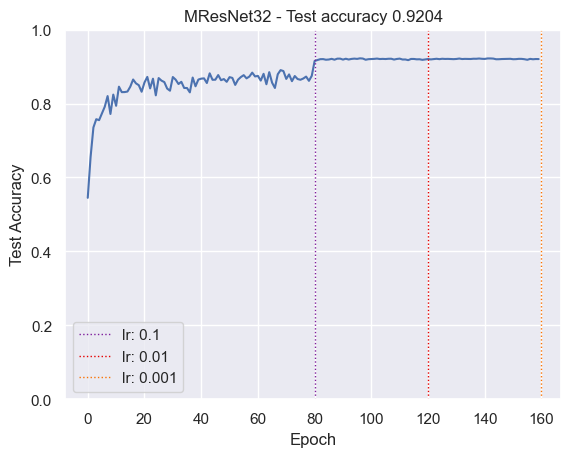

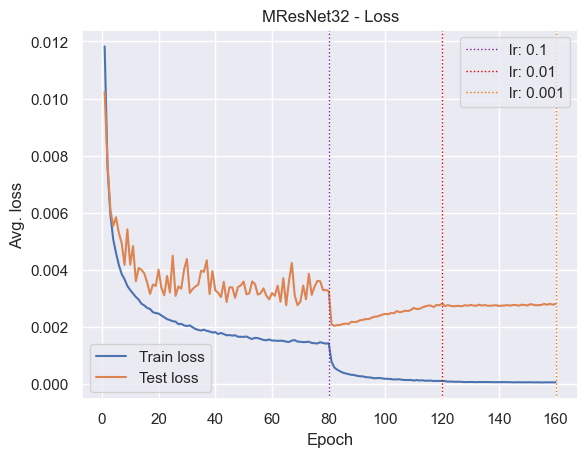

In [13]:
with open(p) as f:
    lines = f.read()

data = re.findall(
    r"Epoch (\d+) finished, average loss: (\d+\.\d+)\n[\d\- :\.]*\nStarting testing\n[\d\- :\.]*\nCorrect: \d+, total: \d+, accuracy: (\d+\.\d+), average loss: (\d+\.\d+)",
    lines,
    re.MULTILINE,
)
# print(len(data))
# print(data)
epochs = [int(x[0]) for x in data]
losses = [float(x[1]) for x in data]
accuracies = [float(x[2]) for x in data]
test_losses = [float(x[3]) for x in data]

results_mresnet32 = dict(epochs=epochs, losses=losses, accuracies=accuracies, test_losses=test_losses)

fix, ax = plt.subplots()
ax.plot(accuracies)
ax.set_ylim(0, 1)
plt.title(f"{model_name} - Test accuracy {accuracies[-1]:.4f}")
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
cmap = plt.get_cmap("Pastel1")

for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    
plt.legend()
plt.show()

fix, ax = plt.subplots()
train_loss, = ax.plot(epochs, losses, label="Train loss")
test_loss, = ax.plot(epochs, test_losses, label="Test loss")
plt.title(f"{model_name} - Loss")
plt.ylabel("Avg. loss")
plt.xlabel("Epoch")
first_legend = plt.legend(handles=[train_loss, test_loss])

ax = plt.gca().add_artist(first_legend)

lrhs = []
for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    lr_h = plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    lrhs.append(lr_h)

plt.legend(handles=lrhs)
plt.show()

In [14]:
with open(f"{model_name}_ks.txt", "w") as f:
    for i, x in enumerate(net.ks, start=1):
        f.write(f"{i},{x.item()}\n")

## LMResNet-44

In [15]:
batch_size = 128
trainloader, testloader = get_cifar10(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [16]:
from torchinfo import summary
from blocks import BasicBlock
from MResNet import MResNet

In [17]:
net = MResNet(BasicBlock, [7,7,7], num_classes=10, stochastic_depth=False, pretrain=False)
net.cuda()
model_name = "MResNet44"

from pathlib import Path

p = Path(f"{model_name}.txt")
if p.exists():
    p.unlink()

summary(
    net,
    input_size=(batch_size, 3, 32, 32),
    col_names=[
        "input_size",
        "output_size",
        "num_params",
        "kernel_size",
        "mult_adds",
    ],
)

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
MResNet                                  [128, 3, 32, 32]          [128, 10]                 1,109                     --                        --
├─Conv2d: 1-1                            [128, 3, 32, 32]          [128, 16, 32, 32]         432                       [3, 3]                    56,623,104
├─ModuleList: 1-6                        --                        --                        (recursive)               --                        --
│    └─BasicBlock: 2-1                   [128, 16, 32, 32]         [128, 16, 32, 32]         --                        --                        --
│    │    └─BatchNorm2d: 3-1             [128, 16, 32, 32]         [128, 16, 32, 32]         32                        --                        4,096
│    │    └─ReLU: 3-2                    [128, 16, 32, 32]         [128, 16, 32, 32]         -

In [18]:
%%time
sgd_para = {"lr": 1e-3, "weight_decay": 0.0001, "momentum": 0.9}
lr_dict = {80: 0.1, 120: 0.01, 160: 0.001}

# Trainer = NN_SGDTrainer(net,sgd_para, trainloader, testloader, {200:1e-3}, model_name + '.txt')
Trainer = NN_SGDTrainer(
    net,
    sgd_para,
    trainloader,
    testloader,
    lr_dict,
    model_name + ".txt",
)

for i in range(160):  # 100
    Trainer.train()

391it [00:24, 15.73it/s]

Epoch 1 finished, average loss: 0.0120578263
Starting testing


Correct: 5145, total: 10000, accuracy: 0.5144999623, average loss: 0.0110881161


391it [00:25, 15.62it/s]

Epoch 2 finished, average loss: 0.0077375379
Starting testing


Correct: 6575, total: 10000, accuracy: 0.6574999690, average loss: 0.0079297377


391it [00:24, 15.72it/s]

Epoch 3 finished, average loss: 0.0059738744
Starting testing


Correct: 7040, total: 10000, accuracy: 0.7039999962, average loss: 0.0069632715


391it [00:24, 15.69it/s]

Epoch 4 finished, average loss: 0.0050632461
Starting testing


Correct: 7711, total: 10000, accuracy: 0.7710999846, average loss: 0.0053130625


391it [00:24, 15.77it/s]

Epoch 5 finished, average loss: 0.0045418418
Starting testing


Correct: 7733, total: 10000, accuracy: 0.7732999921, average loss: 0.0055059953


391it [00:24, 15.71it/s]

Epoch 6 finished, average loss: 0.0040928448
Starting testing


Correct: 7792, total: 10000, accuracy: 0.7791999578, average loss: 0.0053117752


391it [00:24, 15.69it/s]

Epoch 7 finished, average loss: 0.0038198571
Starting testing


Correct: 8047, total: 10000, accuracy: 0.8046999574, average loss: 0.0045178201


391it [00:24, 15.73it/s]

Epoch 8 finished, average loss: 0.0035320272
Starting testing


Correct: 8273, total: 10000, accuracy: 0.8272999525, average loss: 0.0039326861


391it [00:24, 15.71it/s]

Epoch 9 finished, average loss: 0.0033612903
Starting testing


Correct: 8397, total: 10000, accuracy: 0.8396999836, average loss: 0.0036948213


391it [00:24, 15.76it/s]

Epoch 10 finished, average loss: 0.0031979231
Starting testing


Correct: 8220, total: 10000, accuracy: 0.8219999671, average loss: 0.0041073579


391it [00:24, 15.75it/s]

Epoch 11 finished, average loss: 0.0030367124
Starting testing


Correct: 8278, total: 10000, accuracy: 0.8277999759, average loss: 0.0040663939


391it [00:24, 15.66it/s]

Epoch 12 finished, average loss: 0.0029103655
Starting testing


Correct: 8476, total: 10000, accuracy: 0.8475999832, average loss: 0.0035937226


391it [00:24, 15.74it/s]

Epoch 13 finished, average loss: 0.0027824991
Starting testing


Correct: 8376, total: 10000, accuracy: 0.8375999928, average loss: 0.0036831289


391it [00:24, 15.69it/s]

Epoch 14 finished, average loss: 0.0027327035
Starting testing


Correct: 8524, total: 10000, accuracy: 0.8524000049, average loss: 0.0034914055


391it [00:24, 15.81it/s]

Epoch 15 finished, average loss: 0.0026269210
Starting testing


Correct: 8453, total: 10000, accuracy: 0.8452999592, average loss: 0.0036131017


391it [00:24, 15.96it/s]

Epoch 16 finished, average loss: 0.0024913451
Starting testing


Correct: 8509, total: 10000, accuracy: 0.8508999944, average loss: 0.0035144642


391it [00:24, 15.96it/s]

Epoch 17 finished, average loss: 0.0024287164
Starting testing


Correct: 8581, total: 10000, accuracy: 0.8580999970, average loss: 0.0033374620


391it [00:24, 15.72it/s]

Epoch 18 finished, average loss: 0.0023702107
Starting testing


Correct: 8385, total: 10000, accuracy: 0.8384999633, average loss: 0.0038306755


391it [00:25, 15.64it/s]

Epoch 19 finished, average loss: 0.0022894988
Starting testing


Correct: 8607, total: 10000, accuracy: 0.8606999516, average loss: 0.0033739466


391it [00:24, 15.78it/s]

Epoch 20 finished, average loss: 0.0022606173
Starting testing


Correct: 8444, total: 10000, accuracy: 0.8443999887, average loss: 0.0037383404


391it [00:24, 15.72it/s]

Epoch 21 finished, average loss: 0.0022194744
Starting testing


Correct: 8629, total: 10000, accuracy: 0.8628999591, average loss: 0.0031925452


391it [00:24, 15.97it/s]

Epoch 22 finished, average loss: 0.0021558320
Starting testing


Correct: 8567, total: 10000, accuracy: 0.8567000031, average loss: 0.0033357306


391it [00:24, 15.65it/s]

Epoch 23 finished, average loss: 0.0021030637
Starting testing


Correct: 8569, total: 10000, accuracy: 0.8568999767, average loss: 0.0033893827


391it [00:24, 15.71it/s]

Epoch 24 finished, average loss: 0.0020872540
Starting testing


Correct: 8354, total: 10000, accuracy: 0.8353999853, average loss: 0.0039262387


391it [00:24, 15.68it/s]

Epoch 25 finished, average loss: 0.0020188031
Starting testing


Correct: 8610, total: 10000, accuracy: 0.8610000014, average loss: 0.0033870681


391it [00:24, 15.73it/s]

Epoch 26 finished, average loss: 0.0019876189
Starting testing


Correct: 8656, total: 10000, accuracy: 0.8655999899, average loss: 0.0033228389


391it [00:24, 15.97it/s]

Epoch 27 finished, average loss: 0.0019469387
Starting testing


Correct: 8728, total: 10000, accuracy: 0.8727999926, average loss: 0.0030983829


391it [00:24, 16.04it/s]

Epoch 28 finished, average loss: 0.0019059740
Starting testing


Correct: 8507, total: 10000, accuracy: 0.8506999612, average loss: 0.0035840952


391it [00:24, 16.14it/s]

Epoch 29 finished, average loss: 0.0019059033
Starting testing


Correct: 8705, total: 10000, accuracy: 0.8704999685, average loss: 0.0030527061


391it [00:24, 15.83it/s]

Epoch 30 finished, average loss: 0.0018670959
Starting testing


Correct: 8426, total: 10000, accuracy: 0.8425999880, average loss: 0.0039061001


391it [00:24, 15.84it/s]

Epoch 31 finished, average loss: 0.0018784369
Starting testing


Correct: 8641, total: 10000, accuracy: 0.8640999794, average loss: 0.0033690094


391it [00:24, 15.78it/s]

Epoch 32 finished, average loss: 0.0018334891
Starting testing


Correct: 8544, total: 10000, accuracy: 0.8543999791, average loss: 0.0035355473


391it [00:24, 16.10it/s]

Epoch 33 finished, average loss: 0.0017557227
Starting testing


Correct: 8753, total: 10000, accuracy: 0.8752999902, average loss: 0.0029568627


391it [00:24, 16.18it/s]

Epoch 34 finished, average loss: 0.0017607482
Starting testing


Correct: 8790, total: 10000, accuracy: 0.8789999485, average loss: 0.0029287426


391it [00:24, 16.06it/s]

Epoch 35 finished, average loss: 0.0017382875
Starting testing


Correct: 8598, total: 10000, accuracy: 0.8597999811, average loss: 0.0033770920


391it [00:24, 15.96it/s]


Epoch 36 finished, average loss: 0.0017209327
Starting testing
Correct: 8581, total: 10000, accuracy: 0.8580999970, average loss: 0.0036698712


391it [00:24, 15.86it/s]

Epoch 37 finished, average loss: 0.0016929816
Starting testing


Correct: 8679, total: 10000, accuracy: 0.8678999543, average loss: 0.0032974445


391it [00:24, 15.69it/s]

Epoch 38 finished, average loss: 0.0016810101
Starting testing


Correct: 8647, total: 10000, accuracy: 0.8646999598, average loss: 0.0033407089


391it [00:24, 15.67it/s]

Epoch 39 finished, average loss: 0.0016538041
Starting testing


Correct: 8738, total: 10000, accuracy: 0.8737999797, average loss: 0.0030788494


391it [00:24, 15.71it/s]

Epoch 40 finished, average loss: 0.0016465693
Starting testing


Correct: 8646, total: 10000, accuracy: 0.8646000028, average loss: 0.0034522896


391it [00:24, 15.65it/s]

Epoch 41 finished, average loss: 0.0016440253
Starting testing


Correct: 8891, total: 10000, accuracy: 0.8890999556, average loss: 0.0028233144


391it [00:24, 15.70it/s]

Epoch 42 finished, average loss: 0.0016027570
Starting testing


Correct: 8821, total: 10000, accuracy: 0.8820999861, average loss: 0.0029211418


391it [00:24, 15.74it/s]

Epoch 43 finished, average loss: 0.0015820153
Starting testing


Correct: 8732, total: 10000, accuracy: 0.8731999993, average loss: 0.0031888503


391it [00:24, 15.88it/s]

Epoch 44 finished, average loss: 0.0015399942
Starting testing


Correct: 8667, total: 10000, accuracy: 0.8666999936, average loss: 0.0032421087


391it [00:24, 16.08it/s]

Epoch 45 finished, average loss: 0.0015740806
Starting testing


Correct: 8663, total: 10000, accuracy: 0.8662999868, average loss: 0.0035761912


391it [00:24, 16.04it/s]

Epoch 46 finished, average loss: 0.0015437368
Starting testing


Correct: 8669, total: 10000, accuracy: 0.8668999672, average loss: 0.0033803288


391it [00:24, 16.11it/s]

Epoch 47 finished, average loss: 0.0015518611
Starting testing


Correct: 8856, total: 10000, accuracy: 0.8855999708, average loss: 0.0027972840


391it [00:24, 15.80it/s]

Epoch 48 finished, average loss: 0.0015065392
Starting testing


Correct: 8691, total: 10000, accuracy: 0.8690999746, average loss: 0.0032411692


391it [00:24, 15.84it/s]

Epoch 49 finished, average loss: 0.0015153806
Starting testing


Correct: 8648, total: 10000, accuracy: 0.8647999763, average loss: 0.0034236512


391it [00:24, 15.67it/s]

Epoch 50 finished, average loss: 0.0014931955
Starting testing


Correct: 8679, total: 10000, accuracy: 0.8678999543, average loss: 0.0034308813


391it [00:24, 16.07it/s]

Epoch 51 finished, average loss: 0.0014481386
Starting testing


Correct: 8649, total: 10000, accuracy: 0.8648999929, average loss: 0.0033857850


391it [00:24, 15.77it/s]

Epoch 52 finished, average loss: 0.0014868619
Starting testing


Correct: 8735, total: 10000, accuracy: 0.8734999895, average loss: 0.0031625285


391it [00:24, 15.73it/s]

Epoch 53 finished, average loss: 0.0014464362
Starting testing


Correct: 8763, total: 10000, accuracy: 0.8762999773, average loss: 0.0030628903


391it [00:24, 15.83it/s]

Epoch 54 finished, average loss: 0.0014594859
Starting testing


Correct: 8825, total: 10000, accuracy: 0.8824999928, average loss: 0.0027494943


391it [00:24, 15.85it/s]

Epoch 55 finished, average loss: 0.0014485699
Starting testing


Correct: 8798, total: 10000, accuracy: 0.8797999620, average loss: 0.0029424370


391it [00:24, 15.85it/s]

Epoch 56 finished, average loss: 0.0014267845
Starting testing


Correct: 8784, total: 10000, accuracy: 0.8783999681, average loss: 0.0031357706


391it [00:24, 16.07it/s]

Epoch 57 finished, average loss: 0.0014381607
Starting testing


Correct: 8608, total: 10000, accuracy: 0.8607999682, average loss: 0.0035997494


391it [00:24, 15.83it/s]

Epoch 58 finished, average loss: 0.0013944549
Starting testing


Correct: 8624, total: 10000, accuracy: 0.8623999953, average loss: 0.0037208476


391it [00:24, 15.93it/s]

Epoch 59 finished, average loss: 0.0013900520
Starting testing


Correct: 8789, total: 10000, accuracy: 0.8788999915, average loss: 0.0030302866


391it [00:24, 15.69it/s]

Epoch 60 finished, average loss: 0.0014202925
Starting testing


Correct: 8851, total: 10000, accuracy: 0.8851000071, average loss: 0.0028974785


391it [00:24, 15.69it/s]

Epoch 61 finished, average loss: 0.0014187900
Starting testing


Correct: 8686, total: 10000, accuracy: 0.8685999513, average loss: 0.0032868063


391it [00:25, 15.64it/s]

Epoch 62 finished, average loss: 0.0013845058
Starting testing


Correct: 8870, total: 10000, accuracy: 0.8869999647, average loss: 0.0029091432


391it [00:24, 15.84it/s]

Epoch 63 finished, average loss: 0.0013660980
Starting testing


Correct: 8766, total: 10000, accuracy: 0.8765999675, average loss: 0.0031250396


391it [00:24, 15.69it/s]

Epoch 64 finished, average loss: 0.0013485622
Starting testing


Correct: 8792, total: 10000, accuracy: 0.8791999817, average loss: 0.0030557917


391it [00:24, 15.73it/s]

Epoch 65 finished, average loss: 0.0013683716
Starting testing


Correct: 8532, total: 10000, accuracy: 0.8531999588, average loss: 0.0037028885


391it [00:24, 15.75it/s]

Epoch 66 finished, average loss: 0.0013198940
Starting testing


Correct: 8627, total: 10000, accuracy: 0.8626999855, average loss: 0.0035633623


391it [00:24, 15.76it/s]

Epoch 67 finished, average loss: 0.0013059644
Starting testing


Correct: 8742, total: 10000, accuracy: 0.8741999865, average loss: 0.0032832856


391it [00:24, 15.91it/s]

Epoch 68 finished, average loss: 0.0013201885
Starting testing


Correct: 8886, total: 10000, accuracy: 0.8885999918, average loss: 0.0027507866


391it [00:24, 15.94it/s]

Epoch 69 finished, average loss: 0.0013002408
Starting testing


Correct: 8833, total: 10000, accuracy: 0.8833000064, average loss: 0.0028433011


391it [00:24, 15.94it/s]

Epoch 70 finished, average loss: 0.0013358562
Starting testing


Correct: 8769, total: 10000, accuracy: 0.8768999577, average loss: 0.0030474187


391it [00:24, 15.86it/s]

Epoch 71 finished, average loss: 0.0013033005
Starting testing


Correct: 8894, total: 10000, accuracy: 0.8894000053, average loss: 0.0027860329


391it [00:24, 15.73it/s]

Epoch 72 finished, average loss: 0.0013345753
Starting testing


Correct: 8824, total: 10000, accuracy: 0.8823999763, average loss: 0.0030168980


391it [00:24, 15.67it/s]

Epoch 73 finished, average loss: 0.0012649732
Starting testing


Correct: 8789, total: 10000, accuracy: 0.8788999915, average loss: 0.0031206872


391it [00:24, 15.88it/s]

Epoch 74 finished, average loss: 0.0013139168
Starting testing


Correct: 8706, total: 10000, accuracy: 0.8705999851, average loss: 0.0031884589


391it [00:24, 15.76it/s]

Epoch 75 finished, average loss: 0.0012674376
Starting testing


Correct: 8874, total: 10000, accuracy: 0.8873999715, average loss: 0.0028532278


391it [00:24, 15.72it/s]

Epoch 76 finished, average loss: 0.0012580082
Starting testing


Correct: 8796, total: 10000, accuracy: 0.8795999885, average loss: 0.0030415578


391it [00:24, 15.71it/s]

Epoch 77 finished, average loss: 0.0013107491
Starting testing


Correct: 8850, total: 10000, accuracy: 0.8849999905, average loss: 0.0029177301


391it [00:24, 15.86it/s]

Epoch 78 finished, average loss: 0.0012584079
Starting testing


Correct: 8753, total: 10000, accuracy: 0.8752999902, average loss: 0.0030927668


391it [00:24, 15.72it/s]

Epoch 79 finished, average loss: 0.0012586432
Starting testing


Correct: 8861, total: 10000, accuracy: 0.8860999942, average loss: 0.0029259052


391it [00:24, 15.72it/s]

Epoch 80 finished, average loss: 0.0012217273
Starting testing


Correct: 8729, total: 10000, accuracy: 0.8728999496, average loss: 0.0033800902


391it [00:24, 15.69it/s]

Epoch 81 finished, average loss: 0.0006502768
Starting testing


Correct: 9226, total: 10000, accuracy: 0.9225999713, average loss: 0.0020148805


391it [00:24, 15.71it/s]

Epoch 82 finished, average loss: 0.0004427351
Starting testing


Correct: 9253, total: 10000, accuracy: 0.9253000021, average loss: 0.0020306569


391it [00:24, 15.75it/s]

Epoch 83 finished, average loss: 0.0003720576
Starting testing


Correct: 9257, total: 10000, accuracy: 0.9256999493, average loss: 0.0020431072


391it [00:24, 15.78it/s]

Epoch 84 finished, average loss: 0.0003390347
Starting testing


Correct: 9255, total: 10000, accuracy: 0.9254999757, average loss: 0.0020473731


391it [00:25, 15.60it/s]

Epoch 85 finished, average loss: 0.0002920825
Starting testing


Correct: 9261, total: 10000, accuracy: 0.9260999560, average loss: 0.0020213665


391it [00:24, 15.73it/s]

Epoch 86 finished, average loss: 0.0002651909
Starting testing


Correct: 9265, total: 10000, accuracy: 0.9264999628, average loss: 0.0020671838


391it [00:24, 15.69it/s]

Epoch 87 finished, average loss: 0.0002450854
Starting testing


Correct: 9270, total: 10000, accuracy: 0.9269999862, average loss: 0.0021122753


391it [00:24, 15.66it/s]

Epoch 88 finished, average loss: 0.0002200271
Starting testing


Correct: 9286, total: 10000, accuracy: 0.9285999537, average loss: 0.0020883406


391it [00:24, 15.71it/s]

Epoch 89 finished, average loss: 0.0002140508
Starting testing


Correct: 9260, total: 10000, accuracy: 0.9259999990, average loss: 0.0021595048


391it [00:24, 15.78it/s]

Epoch 90 finished, average loss: 0.0001879246
Starting testing


Correct: 9264, total: 10000, accuracy: 0.9264000058, average loss: 0.0021329228


391it [00:24, 15.65it/s]

Epoch 91 finished, average loss: 0.0001860613
Starting testing


Correct: 9251, total: 10000, accuracy: 0.9250999689, average loss: 0.0021636587


391it [00:24, 15.83it/s]

Epoch 92 finished, average loss: 0.0001699635
Starting testing


Correct: 9248, total: 10000, accuracy: 0.9247999787, average loss: 0.0022609820


391it [00:24, 15.86it/s]

Epoch 93 finished, average loss: 0.0001616447
Starting testing


Correct: 9272, total: 10000, accuracy: 0.9271999598, average loss: 0.0022541990


391it [00:24, 15.76it/s]

Epoch 94 finished, average loss: 0.0001479932
Starting testing


Correct: 9255, total: 10000, accuracy: 0.9254999757, average loss: 0.0022799422


391it [00:24, 15.90it/s]

Epoch 95 finished, average loss: 0.0001403001
Starting testing


Correct: 9265, total: 10000, accuracy: 0.9264999628, average loss: 0.0022692724


391it [00:25, 15.62it/s]

Epoch 96 finished, average loss: 0.0001337701
Starting testing


Correct: 9283, total: 10000, accuracy: 0.9282999635, average loss: 0.0022706719


391it [00:24, 15.91it/s]

Epoch 97 finished, average loss: 0.0001268835
Starting testing


Correct: 9272, total: 10000, accuracy: 0.9271999598, average loss: 0.0023309117


391it [00:24, 15.85it/s]

Epoch 98 finished, average loss: 0.0001224840
Starting testing


Correct: 9279, total: 10000, accuracy: 0.9278999567, average loss: 0.0023302801


391it [00:24, 15.91it/s]

Epoch 99 finished, average loss: 0.0001075676
Starting testing


Correct: 9267, total: 10000, accuracy: 0.9266999960, average loss: 0.0023874203


391it [00:24, 15.94it/s]

Epoch 100 finished, average loss: 0.0001078050
Starting testing


Correct: 9273, total: 10000, accuracy: 0.9272999763, average loss: 0.0024213075


391it [00:25, 15.64it/s]

Epoch 101 finished, average loss: 0.0001030845
Starting testing


Correct: 9266, total: 10000, accuracy: 0.9265999794, average loss: 0.0024072244


391it [00:24, 15.84it/s]

Epoch 102 finished, average loss: 0.0001033954
Starting testing


Correct: 9263, total: 10000, accuracy: 0.9262999892, average loss: 0.0024382253


391it [00:24, 15.98it/s]

Epoch 103 finished, average loss: 0.0000916851
Starting testing


Correct: 9272, total: 10000, accuracy: 0.9271999598, average loss: 0.0023930741


391it [00:24, 15.90it/s]

Epoch 104 finished, average loss: 0.0000935707
Starting testing


Correct: 9272, total: 10000, accuracy: 0.9271999598, average loss: 0.0024052129


391it [00:24, 15.94it/s]

Epoch 105 finished, average loss: 0.0000890720
Starting testing


Correct: 9247, total: 10000, accuracy: 0.9246999621, average loss: 0.0024948104


391it [00:24, 15.82it/s]

Epoch 106 finished, average loss: 0.0000868622
Starting testing


Correct: 9269, total: 10000, accuracy: 0.9268999696, average loss: 0.0024812138


391it [00:24, 15.90it/s]

Epoch 107 finished, average loss: 0.0000816092
Starting testing


Correct: 9266, total: 10000, accuracy: 0.9265999794, average loss: 0.0024597255


391it [00:24, 15.86it/s]

Epoch 108 finished, average loss: 0.0000756754
Starting testing


Correct: 9277, total: 10000, accuracy: 0.9276999831, average loss: 0.0025161488


391it [00:24, 15.80it/s]

Epoch 109 finished, average loss: 0.0000782868
Starting testing


Correct: 9273, total: 10000, accuracy: 0.9272999763, average loss: 0.0024917278


391it [00:24, 15.74it/s]

Epoch 110 finished, average loss: 0.0000727021
Starting testing


Correct: 9268, total: 10000, accuracy: 0.9267999530, average loss: 0.0025952520


391it [00:24, 15.75it/s]

Epoch 111 finished, average loss: 0.0000761987
Starting testing


Correct: 9262, total: 10000, accuracy: 0.9261999726, average loss: 0.0025946457


391it [00:24, 15.80it/s]

Epoch 112 finished, average loss: 0.0000742438
Starting testing


Correct: 9252, total: 10000, accuracy: 0.9251999855, average loss: 0.0026042358


391it [00:24, 15.88it/s]

Epoch 113 finished, average loss: 0.0000718718
Starting testing


Correct: 9265, total: 10000, accuracy: 0.9264999628, average loss: 0.0026270445


391it [00:24, 15.91it/s]

Epoch 114 finished, average loss: 0.0000702198
Starting testing


Correct: 9274, total: 10000, accuracy: 0.9273999929, average loss: 0.0026772019


391it [00:24, 15.92it/s]

Epoch 115 finished, average loss: 0.0000651205
Starting testing


Correct: 9281, total: 10000, accuracy: 0.9280999899, average loss: 0.0026092448


391it [00:24, 15.91it/s]

Epoch 116 finished, average loss: 0.0000667689
Starting testing


Correct: 9278, total: 10000, accuracy: 0.9277999997, average loss: 0.0026507739


391it [00:24, 15.86it/s]

Epoch 117 finished, average loss: 0.0000601434
Starting testing


Correct: 9274, total: 10000, accuracy: 0.9273999929, average loss: 0.0025985161


391it [00:24, 15.71it/s]

Epoch 118 finished, average loss: 0.0000767854
Starting testing


Correct: 9264, total: 10000, accuracy: 0.9264000058, average loss: 0.0025657027


391it [00:24, 15.67it/s]

Epoch 119 finished, average loss: 0.0000659931
Starting testing


Correct: 9281, total: 10000, accuracy: 0.9280999899, average loss: 0.0026509072


391it [00:24, 15.67it/s]

Epoch 120 finished, average loss: 0.0000634277
Starting testing


Correct: 9262, total: 10000, accuracy: 0.9261999726, average loss: 0.0026600098


391it [00:24, 15.67it/s]


Epoch 121 finished, average loss: 0.0000521887
Starting testing
Correct: 9267, total: 10000, accuracy: 0.9266999960, average loss: 0.0025956872


391it [00:24, 15.69it/s]

Epoch 122 finished, average loss: 0.0000491489
Starting testing


Correct: 9283, total: 10000, accuracy: 0.9282999635, average loss: 0.0025709770


391it [00:24, 15.80it/s]

Epoch 123 finished, average loss: 0.0000475150
Starting testing


Correct: 9268, total: 10000, accuracy: 0.9267999530, average loss: 0.0025957668


391it [00:24, 15.77it/s]

Epoch 124 finished, average loss: 0.0000440708
Starting testing


Correct: 9276, total: 10000, accuracy: 0.9275999665, average loss: 0.0025861345


391it [00:24, 15.72it/s]

Epoch 125 finished, average loss: 0.0000467633
Starting testing


Correct: 9280, total: 10000, accuracy: 0.9279999733, average loss: 0.0025784791


391it [00:25, 15.59it/s]

Epoch 126 finished, average loss: 0.0000433747
Starting testing


Correct: 9281, total: 10000, accuracy: 0.9280999899, average loss: 0.0026046490


391it [00:25, 15.60it/s]

Epoch 127 finished, average loss: 0.0000401009
Starting testing


Correct: 9279, total: 10000, accuracy: 0.9278999567, average loss: 0.0025883015


391it [00:25, 15.61it/s]

Epoch 128 finished, average loss: 0.0000380640
Starting testing


Correct: 9277, total: 10000, accuracy: 0.9276999831, average loss: 0.0026021932


391it [00:25, 15.62it/s]

Epoch 129 finished, average loss: 0.0000355546
Starting testing


Correct: 9279, total: 10000, accuracy: 0.9278999567, average loss: 0.0025834752


391it [00:25, 15.62it/s]

Epoch 130 finished, average loss: 0.0000384309
Starting testing


Correct: 9281, total: 10000, accuracy: 0.9280999899, average loss: 0.0025642951


391it [00:25, 15.57it/s]

Epoch 131 finished, average loss: 0.0000381410
Starting testing


Correct: 9284, total: 10000, accuracy: 0.9283999801, average loss: 0.0025959486


391it [00:25, 15.59it/s]

Epoch 132 finished, average loss: 0.0000391663
Starting testing


Correct: 9272, total: 10000, accuracy: 0.9271999598, average loss: 0.0026148508


391it [00:25, 15.63it/s]

Epoch 133 finished, average loss: 0.0000381818
Starting testing


Correct: 9280, total: 10000, accuracy: 0.9279999733, average loss: 0.0025997247


391it [00:25, 15.57it/s]

Epoch 134 finished, average loss: 0.0000361316
Starting testing


Correct: 9278, total: 10000, accuracy: 0.9277999997, average loss: 0.0026009865


391it [00:25, 15.61it/s]

Epoch 135 finished, average loss: 0.0000375487
Starting testing


Correct: 9282, total: 10000, accuracy: 0.9281999469, average loss: 0.0026098795


391it [00:24, 15.70it/s]

Epoch 136 finished, average loss: 0.0000361819
Starting testing


Correct: 9286, total: 10000, accuracy: 0.9285999537, average loss: 0.0025800324


391it [00:25, 15.59it/s]

Epoch 137 finished, average loss: 0.0000357917
Starting testing


Correct: 9277, total: 10000, accuracy: 0.9276999831, average loss: 0.0025818872


391it [00:25, 15.37it/s]

Epoch 138 finished, average loss: 0.0000372410
Starting testing


Correct: 9290, total: 10000, accuracy: 0.9289999604, average loss: 0.0026164383


391it [00:25, 15.48it/s]

Epoch 139 finished, average loss: 0.0000361532
Starting testing


Correct: 9286, total: 10000, accuracy: 0.9285999537, average loss: 0.0025759585


391it [00:25, 15.45it/s]

Epoch 140 finished, average loss: 0.0000332753
Starting testing


Correct: 9280, total: 10000, accuracy: 0.9279999733, average loss: 0.0026076176


391it [00:25, 15.48it/s]

Epoch 141 finished, average loss: 0.0000333710
Starting testing


Correct: 9283, total: 10000, accuracy: 0.9282999635, average loss: 0.0026040145


391it [00:25, 15.42it/s]

Epoch 142 finished, average loss: 0.0000338391
Starting testing


Correct: 9285, total: 10000, accuracy: 0.9284999967, average loss: 0.0025823710


391it [00:25, 15.35it/s]

Epoch 143 finished, average loss: 0.0000328448
Starting testing


Correct: 9281, total: 10000, accuracy: 0.9280999899, average loss: 0.0026228671


391it [00:25, 15.39it/s]

Epoch 144 finished, average loss: 0.0000320778
Starting testing


Correct: 9284, total: 10000, accuracy: 0.9283999801, average loss: 0.0025997066


391it [00:25, 15.53it/s]

Epoch 145 finished, average loss: 0.0000335088
Starting testing


Correct: 9279, total: 10000, accuracy: 0.9278999567, average loss: 0.0026187664


391it [00:24, 15.94it/s]

Epoch 146 finished, average loss: 0.0000324327
Starting testing


Correct: 9281, total: 10000, accuracy: 0.9280999899, average loss: 0.0026143012


391it [00:24, 15.80it/s]

Epoch 147 finished, average loss: 0.0000352661
Starting testing


Correct: 9280, total: 10000, accuracy: 0.9279999733, average loss: 0.0026118118


391it [00:24, 15.82it/s]

Epoch 148 finished, average loss: 0.0000313091
Starting testing


Correct: 9274, total: 10000, accuracy: 0.9273999929, average loss: 0.0026250088


391it [00:25, 15.64it/s]

Epoch 149 finished, average loss: 0.0000328400
Starting testing


Correct: 9287, total: 10000, accuracy: 0.9286999702, average loss: 0.0026308188


391it [00:24, 15.81it/s]

Epoch 150 finished, average loss: 0.0000329318
Starting testing


Correct: 9279, total: 10000, accuracy: 0.9278999567, average loss: 0.0026087759


391it [00:25, 15.60it/s]

Epoch 151 finished, average loss: 0.0000292689
Starting testing


Correct: 9287, total: 10000, accuracy: 0.9286999702, average loss: 0.0026164199


391it [00:25, 15.58it/s]


Epoch 152 finished, average loss: 0.0000333347
Starting testing
Correct: 9285, total: 10000, accuracy: 0.9284999967, average loss: 0.0026192763


391it [00:24, 16.00it/s]

Epoch 153 finished, average loss: 0.0000328041
Starting testing


Correct: 9284, total: 10000, accuracy: 0.9283999801, average loss: 0.0026393715


391it [00:24, 16.01it/s]

Epoch 154 finished, average loss: 0.0000305122
Starting testing


Correct: 9282, total: 10000, accuracy: 0.9281999469, average loss: 0.0026313710


391it [00:24, 15.68it/s]

Epoch 155 finished, average loss: 0.0000302201
Starting testing


Correct: 9282, total: 10000, accuracy: 0.9281999469, average loss: 0.0026718425


391it [00:25, 15.28it/s]

Epoch 156 finished, average loss: 0.0000327441
Starting testing


Correct: 9280, total: 10000, accuracy: 0.9279999733, average loss: 0.0026465430


391it [00:26, 14.95it/s]

Epoch 157 finished, average loss: 0.0000296277
Starting testing


Correct: 9282, total: 10000, accuracy: 0.9281999469, average loss: 0.0026428147


391it [00:24, 15.64it/s]

Epoch 158 finished, average loss: 0.0000319262
Starting testing


Correct: 9289, total: 10000, accuracy: 0.9289000034, average loss: 0.0026356108


391it [00:24, 15.67it/s]


Epoch 159 finished, average loss: 0.0000300178
Starting testing
Correct: 9290, total: 10000, accuracy: 0.9289999604, average loss: 0.0026232437


391it [00:24, 15.74it/s]

Epoch 160 finished, average loss: 0.0000306398
Starting testing


Correct: 9279, total: 10000, accuracy: 0.9278999567, average loss: 0.0026650721
CPU times: user 1h 6min 59s, sys: 2min 53s, total: 1h 9min 52s
Wall time: 1h 11min 16s


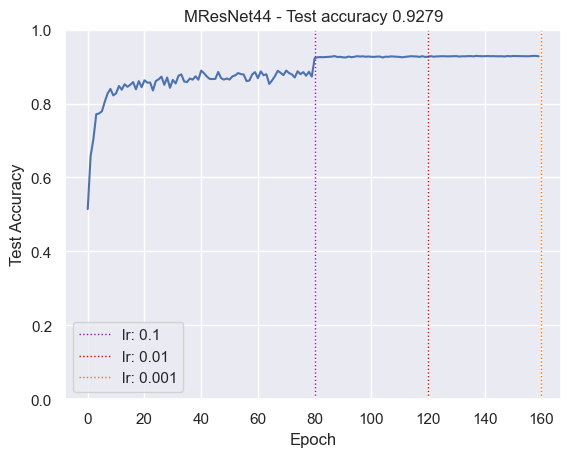

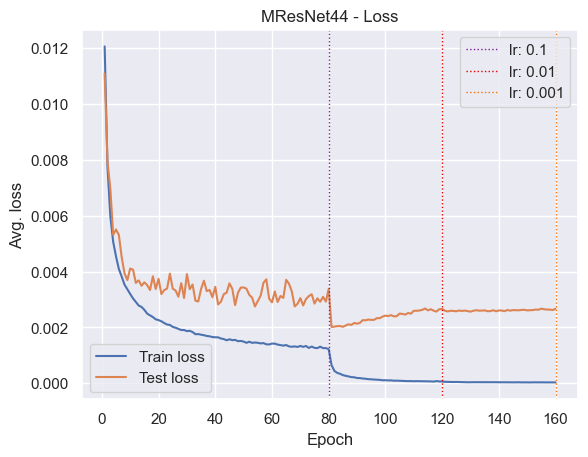

In [19]:
with open(p) as f:
    lines = f.read()

data = re.findall(
    r"Epoch (\d+) finished, average loss: (\d+\.\d+)\n[\d\- :\.]*\nStarting testing\n[\d\- :\.]*\nCorrect: \d+, total: \d+, accuracy: (\d+\.\d+), average loss: (\d+\.\d+)",
    lines,
    re.MULTILINE,
)
# print(len(data))
# print(data)
epochs = [int(x[0]) for x in data]
losses = [float(x[1]) for x in data]
accuracies = [float(x[2]) for x in data]
test_losses = [float(x[3]) for x in data]

results_mresnet44 = dict(epochs=epochs, losses=losses, accuracies=accuracies, test_losses=test_losses)

fix, ax = plt.subplots()
ax.plot(accuracies)
ax.set_ylim(0, 1)
plt.title(f"{model_name} - Test accuracy {accuracies[-1]:.4f}")
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
cmap = plt.get_cmap("Pastel1")

for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    
plt.legend()
plt.show()

fix, ax = plt.subplots()
train_loss, = ax.plot(epochs, losses, label="Train loss")
test_loss, = ax.plot(epochs, test_losses, label="Test loss")
plt.title(f"{model_name} - Loss")
plt.ylabel("Avg. loss")
plt.xlabel("Epoch")
first_legend = plt.legend(handles=[train_loss, test_loss])

ax = plt.gca().add_artist(first_legend)

lrhs = []
for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    lr_h = plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    lrhs.append(lr_h)

plt.legend(handles=lrhs)
plt.show()

In [20]:
with open(f"{model_name}_ks.txt", "w") as f:
    for i, x in enumerate(net.ks, start=1):
        f.write(f"{i},{x.item()}\n")

## LMResNet-56

In [21]:
batch_size = 128
trainloader, testloader = get_cifar10(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [22]:
from torchinfo import summary
from blocks import BasicBlock
from MResNet import MResNet

In [23]:
net = MResNet(BasicBlock, [9,9,9], num_classes=10, stochastic_depth=False, pretrain=False)
net.cuda()
model_name = "MResNet56"

from pathlib import Path

p = Path(f"{model_name}.txt")
if p.exists():
    p.unlink()

summary(
    net,
    input_size=(batch_size, 3, 32, 32),
    col_names=[
        "input_size",
        "output_size",
        "num_params",
        "kernel_size",
        "mult_adds",
    ],
)

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
MResNet                                  [128, 3, 32, 32]          [128, 10]                 1,115                     --                        --
├─Conv2d: 1-1                            [128, 3, 32, 32]          [128, 16, 32, 32]         432                       [3, 3]                    56,623,104
├─ModuleList: 1-6                        --                        --                        (recursive)               --                        --
│    └─BasicBlock: 2-1                   [128, 16, 32, 32]         [128, 16, 32, 32]         --                        --                        --
│    │    └─BatchNorm2d: 3-1             [128, 16, 32, 32]         [128, 16, 32, 32]         32                        --                        4,096
│    │    └─ReLU: 3-2                    [128, 16, 32, 32]         [128, 16, 32, 32]         -

In [24]:
%%time
sgd_para = {"lr": 1e-3, "weight_decay": 0.0001, "momentum": 0.9}
lr_dict = {80: 0.1, 120: 0.01, 160: 0.001}

# Trainer = NN_SGDTrainer(net,sgd_para, trainloader, testloader, {200:1e-3}, model_name + '.txt')
Trainer = NN_SGDTrainer(
    net,
    sgd_para,
    trainloader,
    testloader,
    lr_dict,
    model_name + ".txt",
)

for i in range(160):  # 100
    Trainer.train()

391it [00:31, 12.35it/s]

Epoch 1 finished, average loss: 0.0116254293
Starting testing


Correct: 5407, total: 10000, accuracy: 0.5406999588, average loss: 0.0100520330


391it [00:31, 12.37it/s]


Epoch 2 finished, average loss: 0.0077067694
Starting testing
Correct: 5707, total: 10000, accuracy: 0.5706999898, average loss: 0.0102458792


391it [00:31, 12.46it/s]

Epoch 3 finished, average loss: 0.0060613642
Starting testing


Correct: 7612, total: 10000, accuracy: 0.7611999512, average loss: 0.0054484230


391it [00:31, 12.46it/s]

Epoch 4 finished, average loss: 0.0051375472
Starting testing


Correct: 7535, total: 10000, accuracy: 0.7534999847, average loss: 0.0056506464


391it [00:31, 12.39it/s]

Epoch 5 finished, average loss: 0.0045543629
Starting testing


Correct: 7722, total: 10000, accuracy: 0.7721999884, average loss: 0.0051991403


391it [00:31, 12.28it/s]

Epoch 6 finished, average loss: 0.0041594613
Starting testing


Correct: 7961, total: 10000, accuracy: 0.7960999608, average loss: 0.0047983609


391it [00:31, 12.34it/s]

Epoch 7 finished, average loss: 0.0038444152
Starting testing


Correct: 8195, total: 10000, accuracy: 0.8194999695, average loss: 0.0042170849


391it [00:31, 12.38it/s]

Epoch 8 finished, average loss: 0.0036167267
Starting testing


Correct: 8058, total: 10000, accuracy: 0.8057999611, average loss: 0.0045659360


391it [00:31, 12.37it/s]

Epoch 9 finished, average loss: 0.0033810334
Starting testing


Correct: 8087, total: 10000, accuracy: 0.8086999655, average loss: 0.0044797150


391it [00:31, 12.30it/s]

Epoch 10 finished, average loss: 0.0032086054
Starting testing


Correct: 8345, total: 10000, accuracy: 0.8344999552, average loss: 0.0038829497


391it [00:31, 12.30it/s]

Epoch 11 finished, average loss: 0.0030597542
Starting testing


Correct: 8305, total: 10000, accuracy: 0.8305000067, average loss: 0.0038919879


391it [00:31, 12.33it/s]

Epoch 12 finished, average loss: 0.0029289352
Starting testing


Correct: 8146, total: 10000, accuracy: 0.8145999908, average loss: 0.0046499121


391it [00:31, 12.36it/s]

Epoch 13 finished, average loss: 0.0027840605
Starting testing


Correct: 8404, total: 10000, accuracy: 0.8403999805, average loss: 0.0037197092


391it [00:31, 12.38it/s]

Epoch 14 finished, average loss: 0.0026832087
Starting testing


Correct: 8466, total: 10000, accuracy: 0.8465999961, average loss: 0.0035622388


391it [00:31, 12.35it/s]

Epoch 15 finished, average loss: 0.0026165227
Starting testing


Correct: 8491, total: 10000, accuracy: 0.8490999937, average loss: 0.0036198179


391it [00:31, 12.27it/s]

Epoch 16 finished, average loss: 0.0025386999
Starting testing


Correct: 8265, total: 10000, accuracy: 0.8264999986, average loss: 0.0041021772


391it [00:31, 12.36it/s]

Epoch 17 finished, average loss: 0.0024346713
Starting testing


Correct: 8540, total: 10000, accuracy: 0.8539999723, average loss: 0.0035140010


391it [00:31, 12.48it/s]

Epoch 18 finished, average loss: 0.0024180800
Starting testing


Correct: 8628, total: 10000, accuracy: 0.8628000021, average loss: 0.0032295950


391it [00:31, 12.39it/s]

Epoch 19 finished, average loss: 0.0022838981
Starting testing


Correct: 8480, total: 10000, accuracy: 0.8479999900, average loss: 0.0036184355


391it [00:31, 12.30it/s]

Epoch 20 finished, average loss: 0.0022600939
Starting testing


Correct: 8410, total: 10000, accuracy: 0.8409999609, average loss: 0.0037344795


391it [00:31, 12.31it/s]


Epoch 21 finished, average loss: 0.0022237312
Starting testing
Correct: 8395, total: 10000, accuracy: 0.8394999504, average loss: 0.0038196566


391it [00:31, 12.36it/s]

Epoch 22 finished, average loss: 0.0021198388
Starting testing


Correct: 8667, total: 10000, accuracy: 0.8666999936, average loss: 0.0031961322


391it [00:31, 12.39it/s]

Epoch 23 finished, average loss: 0.0021037360
Starting testing


Correct: 8443, total: 10000, accuracy: 0.8442999721, average loss: 0.0038841494


391it [00:31, 12.23it/s]

Epoch 24 finished, average loss: 0.0020662522
Starting testing


Correct: 8458, total: 10000, accuracy: 0.8457999825, average loss: 0.0039665354


391it [00:31, 12.29it/s]

Epoch 25 finished, average loss: 0.0019979868
Starting testing


Correct: 8552, total: 10000, accuracy: 0.8551999927, average loss: 0.0035267159


391it [00:31, 12.40it/s]

Epoch 26 finished, average loss: 0.0019450213
Starting testing


Correct: 8571, total: 10000, accuracy: 0.8570999503, average loss: 0.0036432201


391it [00:31, 12.44it/s]

Epoch 27 finished, average loss: 0.0019341382
Starting testing


Correct: 8587, total: 10000, accuracy: 0.8586999774, average loss: 0.0032293740


391it [00:31, 12.32it/s]

Epoch 28 finished, average loss: 0.0018894186
Starting testing


Correct: 8712, total: 10000, accuracy: 0.8711999655, average loss: 0.0029751387


391it [00:31, 12.43it/s]

Epoch 29 finished, average loss: 0.0018661413
Starting testing


Correct: 8379, total: 10000, accuracy: 0.8378999829, average loss: 0.0039939099


391it [00:31, 12.41it/s]

Epoch 30 finished, average loss: 0.0018355029
Starting testing


Correct: 8732, total: 10000, accuracy: 0.8731999993, average loss: 0.0031299381


391it [00:31, 12.48it/s]

Epoch 31 finished, average loss: 0.0018345756
Starting testing


Correct: 8350, total: 10000, accuracy: 0.8349999785, average loss: 0.0039888024


391it [00:31, 12.47it/s]

Epoch 32 finished, average loss: 0.0017848345
Starting testing


Correct: 8556, total: 10000, accuracy: 0.8555999994, average loss: 0.0036054387


391it [00:31, 12.51it/s]

Epoch 33 finished, average loss: 0.0017611951
Starting testing


Correct: 8777, total: 10000, accuracy: 0.8776999712, average loss: 0.0029476995


391it [00:31, 12.45it/s]

Epoch 34 finished, average loss: 0.0017213089
Starting testing


Correct: 8567, total: 10000, accuracy: 0.8567000031, average loss: 0.0038713499


391it [00:31, 12.45it/s]

Epoch 35 finished, average loss: 0.0016752114
Starting testing


Correct: 8361, total: 10000, accuracy: 0.8360999823, average loss: 0.0041231645


391it [00:31, 12.49it/s]

Epoch 36 finished, average loss: 0.0016792946
Starting testing


Correct: 8762, total: 10000, accuracy: 0.8761999607, average loss: 0.0031215669


391it [00:31, 12.43it/s]

Epoch 37 finished, average loss: 0.0016286510
Starting testing


Correct: 8687, total: 10000, accuracy: 0.8686999679, average loss: 0.0033235264


391it [00:31, 12.37it/s]

Epoch 38 finished, average loss: 0.0016234368
Starting testing


Correct: 8708, total: 10000, accuracy: 0.8707999587, average loss: 0.0032351458


391it [00:31, 12.29it/s]

Epoch 39 finished, average loss: 0.0016373409
Starting testing


Correct: 8704, total: 10000, accuracy: 0.8703999519, average loss: 0.0033442142


391it [00:31, 12.32it/s]


Epoch 40 finished, average loss: 0.0016209129
Starting testing
Correct: 8549, total: 10000, accuracy: 0.8549000025, average loss: 0.0035992213


391it [00:31, 12.29it/s]

Epoch 41 finished, average loss: 0.0015717917
Starting testing


Correct: 8677, total: 10000, accuracy: 0.8676999807, average loss: 0.0034026631


391it [00:31, 12.40it/s]

Epoch 42 finished, average loss: 0.0015399561
Starting testing


Correct: 8785, total: 10000, accuracy: 0.8784999847, average loss: 0.0030737532


391it [00:31, 12.38it/s]

Epoch 43 finished, average loss: 0.0015223528
Starting testing


Correct: 8684, total: 10000, accuracy: 0.8683999777, average loss: 0.0033027893


391it [00:31, 12.37it/s]

Epoch 44 finished, average loss: 0.0015233208
Starting testing


Correct: 8564, total: 10000, accuracy: 0.8563999534, average loss: 0.0036116527


391it [00:31, 12.41it/s]

Epoch 45 finished, average loss: 0.0014918071
Starting testing


Correct: 8628, total: 10000, accuracy: 0.8628000021, average loss: 0.0036255103


391it [00:31, 12.33it/s]

Epoch 46 finished, average loss: 0.0014767747
Starting testing


Correct: 8836, total: 10000, accuracy: 0.8835999966, average loss: 0.0029676725


391it [00:31, 12.33it/s]

Epoch 47 finished, average loss: 0.0014825227
Starting testing


Correct: 8889, total: 10000, accuracy: 0.8888999820, average loss: 0.0028082106


391it [00:31, 12.38it/s]

Epoch 48 finished, average loss: 0.0014430744
Starting testing


Correct: 8728, total: 10000, accuracy: 0.8727999926, average loss: 0.0032011625


391it [00:31, 12.38it/s]

Epoch 49 finished, average loss: 0.0014883358
Starting testing


Correct: 8825, total: 10000, accuracy: 0.8824999928, average loss: 0.0028801411


391it [00:31, 12.34it/s]

Epoch 50 finished, average loss: 0.0013934378
Starting testing


Correct: 8821, total: 10000, accuracy: 0.8820999861, average loss: 0.0029742654


391it [00:31, 12.36it/s]


Epoch 51 finished, average loss: 0.0014352096
Starting testing
Correct: 8714, total: 10000, accuracy: 0.8713999987, average loss: 0.0033142419


391it [00:31, 12.24it/s]

Epoch 52 finished, average loss: 0.0013882671
Starting testing


Correct: 8591, total: 10000, accuracy: 0.8590999842, average loss: 0.0035276583


391it [00:31, 12.32it/s]

Epoch 53 finished, average loss: 0.0013907401
Starting testing


Correct: 8849, total: 10000, accuracy: 0.8848999739, average loss: 0.0029031202


391it [00:31, 12.27it/s]

Epoch 54 finished, average loss: 0.0014307839
Starting testing


Correct: 8735, total: 10000, accuracy: 0.8734999895, average loss: 0.0031418464


391it [00:31, 12.31it/s]

Epoch 55 finished, average loss: 0.0013638227
Starting testing


Correct: 8801, total: 10000, accuracy: 0.8800999522, average loss: 0.0031300722


391it [00:31, 12.28it/s]

Epoch 56 finished, average loss: 0.0013780617
Starting testing


Correct: 8670, total: 10000, accuracy: 0.8669999838, average loss: 0.0032475254


391it [00:31, 12.27it/s]

Epoch 57 finished, average loss: 0.0013763350
Starting testing


Correct: 8718, total: 10000, accuracy: 0.8718000054, average loss: 0.0031774105


391it [00:31, 12.31it/s]

Epoch 58 finished, average loss: 0.0013363968
Starting testing


Correct: 8816, total: 10000, accuracy: 0.8815999627, average loss: 0.0029185304


391it [00:31, 12.42it/s]

Epoch 59 finished, average loss: 0.0013614904
Starting testing


Correct: 8838, total: 10000, accuracy: 0.8837999701, average loss: 0.0029951121


391it [00:31, 12.53it/s]

Epoch 60 finished, average loss: 0.0013153548
Starting testing


Correct: 8589, total: 10000, accuracy: 0.8588999510, average loss: 0.0035856241


391it [00:31, 12.47it/s]


Epoch 61 finished, average loss: 0.0012853124
Starting testing
Correct: 8726, total: 10000, accuracy: 0.8725999594, average loss: 0.0032596453


391it [00:31, 12.56it/s]

Epoch 62 finished, average loss: 0.0013009997
Starting testing


Correct: 8638, total: 10000, accuracy: 0.8637999892, average loss: 0.0037629235


391it [00:31, 12.59it/s]


Epoch 63 finished, average loss: 0.0013100327
Starting testing
Correct: 8857, total: 10000, accuracy: 0.8856999874, average loss: 0.0028953846


391it [00:31, 12.43it/s]

Epoch 64 finished, average loss: 0.0012850863
Starting testing


Correct: 8773, total: 10000, accuracy: 0.8772999644, average loss: 0.0032400669


391it [00:30, 12.62it/s]

Epoch 65 finished, average loss: 0.0012813709
Starting testing


Correct: 8832, total: 10000, accuracy: 0.8831999898, average loss: 0.0031149442


391it [00:31, 12.36it/s]

Epoch 66 finished, average loss: 0.0012988676
Starting testing


Correct: 8863, total: 10000, accuracy: 0.8862999678, average loss: 0.0028330845


391it [00:31, 12.41it/s]

Epoch 67 finished, average loss: 0.0012553883
Starting testing


Correct: 8865, total: 10000, accuracy: 0.8865000010, average loss: 0.0029562372


391it [00:31, 12.47it/s]

Epoch 68 finished, average loss: 0.0012776523
Starting testing


Correct: 8825, total: 10000, accuracy: 0.8824999928, average loss: 0.0028451590


391it [00:31, 12.34it/s]

Epoch 69 finished, average loss: 0.0012602886
Starting testing


Correct: 8838, total: 10000, accuracy: 0.8837999701, average loss: 0.0029267049


391it [00:31, 12.33it/s]

Epoch 70 finished, average loss: 0.0012319995
Starting testing


Correct: 8916, total: 10000, accuracy: 0.8915999532, average loss: 0.0027248680


391it [00:31, 12.40it/s]

Epoch 71 finished, average loss: 0.0012663908
Starting testing


Correct: 8850, total: 10000, accuracy: 0.8849999905, average loss: 0.0028909681


391it [00:31, 12.41it/s]

Epoch 72 finished, average loss: 0.0012267733
Starting testing


Correct: 8975, total: 10000, accuracy: 0.8974999785, average loss: 0.0026942656


391it [00:31, 12.40it/s]

Epoch 73 finished, average loss: 0.0012270098
Starting testing


Correct: 8729, total: 10000, accuracy: 0.8728999496, average loss: 0.0032751067


391it [00:31, 12.41it/s]

Epoch 74 finished, average loss: 0.0012152794
Starting testing


Correct: 8703, total: 10000, accuracy: 0.8702999949, average loss: 0.0035602110


391it [00:31, 12.40it/s]

Epoch 75 finished, average loss: 0.0012193798
Starting testing


Correct: 8867, total: 10000, accuracy: 0.8866999745, average loss: 0.0029499480


391it [00:31, 12.35it/s]

Epoch 76 finished, average loss: 0.0012083342
Starting testing


Correct: 8743, total: 10000, accuracy: 0.8743000031, average loss: 0.0030336401


391it [00:31, 12.45it/s]

Epoch 77 finished, average loss: 0.0012868951
Starting testing


Correct: 8829, total: 10000, accuracy: 0.8828999996, average loss: 0.0029265757


391it [00:31, 12.36it/s]

Epoch 78 finished, average loss: 0.0011820239
Starting testing


Correct: 8630, total: 10000, accuracy: 0.8629999757, average loss: 0.0036308640


391it [00:31, 12.31it/s]

Epoch 79 finished, average loss: 0.0012068916
Starting testing


Correct: 8821, total: 10000, accuracy: 0.8820999861, average loss: 0.0030028407


391it [00:31, 12.35it/s]

Epoch 80 finished, average loss: 0.0012205839
Starting testing


Correct: 8843, total: 10000, accuracy: 0.8842999935, average loss: 0.0029872580


391it [00:31, 12.34it/s]

Epoch 81 finished, average loss: 0.0006033626
Starting testing


Correct: 9243, total: 10000, accuracy: 0.9242999554, average loss: 0.0019415581


391it [00:31, 12.35it/s]

Epoch 82 finished, average loss: 0.0003967711
Starting testing


Correct: 9253, total: 10000, accuracy: 0.9253000021, average loss: 0.0019191664


391it [00:31, 12.35it/s]

Epoch 83 finished, average loss: 0.0003241575
Starting testing


Correct: 9269, total: 10000, accuracy: 0.9268999696, average loss: 0.0019142891


391it [00:31, 12.33it/s]

Epoch 84 finished, average loss: 0.0002668760
Starting testing


Correct: 9285, total: 10000, accuracy: 0.9284999967, average loss: 0.0019189827


391it [00:31, 12.40it/s]

Epoch 85 finished, average loss: 0.0002449467
Starting testing


Correct: 9280, total: 10000, accuracy: 0.9279999733, average loss: 0.0019496504


391it [00:31, 12.38it/s]

Epoch 86 finished, average loss: 0.0002247055
Starting testing


Correct: 9281, total: 10000, accuracy: 0.9280999899, average loss: 0.0019696652


391it [00:31, 12.38it/s]

Epoch 87 finished, average loss: 0.0001927481
Starting testing


Correct: 9274, total: 10000, accuracy: 0.9273999929, average loss: 0.0020497687


391it [00:31, 12.34it/s]

Epoch 88 finished, average loss: 0.0001804753
Starting testing


Correct: 9292, total: 10000, accuracy: 0.9291999936, average loss: 0.0020739166


391it [00:31, 12.27it/s]

Epoch 89 finished, average loss: 0.0001607370
Starting testing


Correct: 9294, total: 10000, accuracy: 0.9293999672, average loss: 0.0020553587


391it [00:31, 12.33it/s]

Epoch 90 finished, average loss: 0.0001558887
Starting testing


Correct: 9296, total: 10000, accuracy: 0.9296000004, average loss: 0.0020899329


391it [00:31, 12.23it/s]

Epoch 91 finished, average loss: 0.0001457072
Starting testing


Correct: 9305, total: 10000, accuracy: 0.9304999709, average loss: 0.0021070816


391it [00:31, 12.36it/s]

Epoch 92 finished, average loss: 0.0001298997
Starting testing


Correct: 9279, total: 10000, accuracy: 0.9278999567, average loss: 0.0021715308


391it [00:31, 12.38it/s]

Epoch 93 finished, average loss: 0.0001244806
Starting testing


Correct: 9273, total: 10000, accuracy: 0.9272999763, average loss: 0.0022158202


391it [00:31, 12.34it/s]

Epoch 94 finished, average loss: 0.0001192070
Starting testing


Correct: 9301, total: 10000, accuracy: 0.9300999641, average loss: 0.0021694325


391it [00:31, 12.36it/s]

Epoch 95 finished, average loss: 0.0001087243
Starting testing


Correct: 9273, total: 10000, accuracy: 0.9272999763, average loss: 0.0022290628


391it [00:31, 12.38it/s]

Epoch 96 finished, average loss: 0.0001015774
Starting testing


Correct: 9298, total: 10000, accuracy: 0.9297999740, average loss: 0.0021838953


391it [00:31, 12.30it/s]

Epoch 97 finished, average loss: 0.0000976059
Starting testing


Correct: 9284, total: 10000, accuracy: 0.9283999801, average loss: 0.0022468252


391it [00:31, 12.27it/s]

Epoch 98 finished, average loss: 0.0000858795
Starting testing


Correct: 9284, total: 10000, accuracy: 0.9283999801, average loss: 0.0022491656


391it [00:31, 12.23it/s]

Epoch 99 finished, average loss: 0.0000889292
Starting testing


Correct: 9292, total: 10000, accuracy: 0.9291999936, average loss: 0.0022552664


391it [00:31, 12.27it/s]

Epoch 100 finished, average loss: 0.0000836113
Starting testing


Correct: 9286, total: 10000, accuracy: 0.9285999537, average loss: 0.0022764115


391it [00:31, 12.32it/s]

Epoch 101 finished, average loss: 0.0000761828
Starting testing


Correct: 9306, total: 10000, accuracy: 0.9305999875, average loss: 0.0023065195


391it [00:31, 12.32it/s]


Epoch 102 finished, average loss: 0.0000783848
Starting testing
Correct: 9282, total: 10000, accuracy: 0.9281999469, average loss: 0.0023370149


391it [00:31, 12.33it/s]

Epoch 103 finished, average loss: 0.0000749519
Starting testing


Correct: 9312, total: 10000, accuracy: 0.9311999679, average loss: 0.0023386724


391it [00:31, 12.28it/s]


Epoch 104 finished, average loss: 0.0000602692
Starting testing
Correct: 9313, total: 10000, accuracy: 0.9312999845, average loss: 0.0023318340


391it [00:31, 12.25it/s]

Epoch 105 finished, average loss: 0.0000667476
Starting testing


Correct: 9306, total: 10000, accuracy: 0.9305999875, average loss: 0.0023760692


391it [00:31, 12.29it/s]

Epoch 106 finished, average loss: 0.0000648190
Starting testing


Correct: 9286, total: 10000, accuracy: 0.9285999537, average loss: 0.0023920853


391it [00:31, 12.25it/s]

Epoch 107 finished, average loss: 0.0000590701
Starting testing


Correct: 9280, total: 10000, accuracy: 0.9279999733, average loss: 0.0023947526


391it [00:31, 12.37it/s]

Epoch 108 finished, average loss: 0.0000549019
Starting testing


Correct: 9301, total: 10000, accuracy: 0.9300999641, average loss: 0.0024053049


391it [00:31, 12.37it/s]

Epoch 109 finished, average loss: 0.0000535721
Starting testing


Correct: 9307, total: 10000, accuracy: 0.9307000041, average loss: 0.0023476083


391it [00:31, 12.28it/s]

Epoch 110 finished, average loss: 0.0000624946
Starting testing


Correct: 9308, total: 10000, accuracy: 0.9307999611, average loss: 0.0023766753


391it [00:31, 12.29it/s]

Epoch 111 finished, average loss: 0.0000523432
Starting testing


Correct: 9323, total: 10000, accuracy: 0.9322999716, average loss: 0.0023683693


391it [00:31, 12.26it/s]

Epoch 112 finished, average loss: 0.0000532568
Starting testing


Correct: 9302, total: 10000, accuracy: 0.9301999807, average loss: 0.0024320579


391it [00:31, 12.31it/s]

Epoch 113 finished, average loss: 0.0000488343
Starting testing


Correct: 9307, total: 10000, accuracy: 0.9307000041, average loss: 0.0024688817


391it [00:31, 12.28it/s]


Epoch 114 finished, average loss: 0.0000511332
Starting testing
Correct: 9307, total: 10000, accuracy: 0.9307000041, average loss: 0.0024485312


391it [00:31, 12.29it/s]

Epoch 115 finished, average loss: 0.0000471969
Starting testing


Correct: 9313, total: 10000, accuracy: 0.9312999845, average loss: 0.0024799685


391it [00:31, 12.46it/s]

Epoch 116 finished, average loss: 0.0000501365
Starting testing


Correct: 9297, total: 10000, accuracy: 0.9296999574, average loss: 0.0024731465


391it [00:31, 12.37it/s]

Epoch 117 finished, average loss: 0.0000453122
Starting testing


Correct: 9314, total: 10000, accuracy: 0.9314000010, average loss: 0.0024336563


391it [00:31, 12.27it/s]

Epoch 118 finished, average loss: 0.0000441765
Starting testing


Correct: 9310, total: 10000, accuracy: 0.9309999943, average loss: 0.0025066417


391it [00:31, 12.30it/s]

Epoch 119 finished, average loss: 0.0000425192
Starting testing


Correct: 9305, total: 10000, accuracy: 0.9304999709, average loss: 0.0025393430


391it [00:31, 12.30it/s]

Epoch 120 finished, average loss: 0.0000403285
Starting testing


Correct: 9325, total: 10000, accuracy: 0.9325000048, average loss: 0.0024641211


391it [00:31, 12.25it/s]

Epoch 121 finished, average loss: 0.0000351827
Starting testing


Correct: 9317, total: 10000, accuracy: 0.9316999912, average loss: 0.0024724811


391it [00:31, 12.32it/s]

Epoch 122 finished, average loss: 0.0000342324
Starting testing


Correct: 9310, total: 10000, accuracy: 0.9309999943, average loss: 0.0024570219


391it [00:31, 12.42it/s]

Epoch 123 finished, average loss: 0.0000351425
Starting testing


Correct: 9312, total: 10000, accuracy: 0.9311999679, average loss: 0.0024710613


391it [00:31, 12.35it/s]

Epoch 124 finished, average loss: 0.0000318656
Starting testing


Correct: 9312, total: 10000, accuracy: 0.9311999679, average loss: 0.0024695554


391it [00:31, 12.33it/s]

Epoch 125 finished, average loss: 0.0000311174
Starting testing


Correct: 9309, total: 10000, accuracy: 0.9308999777, average loss: 0.0024849951


391it [00:31, 12.33it/s]

Epoch 126 finished, average loss: 0.0000325645
Starting testing


Correct: 9305, total: 10000, accuracy: 0.9304999709, average loss: 0.0024464724


391it [00:31, 12.31it/s]

Epoch 127 finished, average loss: 0.0000296781
Starting testing


Correct: 9310, total: 10000, accuracy: 0.9309999943, average loss: 0.0024853632


391it [00:31, 12.34it/s]

Epoch 128 finished, average loss: 0.0000288072
Starting testing


Correct: 9309, total: 10000, accuracy: 0.9308999777, average loss: 0.0024693419


391it [00:31, 12.34it/s]

Epoch 129 finished, average loss: 0.0000320414
Starting testing


Correct: 9318, total: 10000, accuracy: 0.9317999482, average loss: 0.0024825631


391it [00:31, 12.41it/s]

Epoch 130 finished, average loss: 0.0000298126
Starting testing


Correct: 9312, total: 10000, accuracy: 0.9311999679, average loss: 0.0024735847


391it [00:31, 12.40it/s]

Epoch 131 finished, average loss: 0.0000256571
Starting testing


Correct: 9312, total: 10000, accuracy: 0.9311999679, average loss: 0.0024846735


391it [00:31, 12.52it/s]

Epoch 132 finished, average loss: 0.0000241775
Starting testing


Correct: 9313, total: 10000, accuracy: 0.9312999845, average loss: 0.0024475481


391it [00:28, 13.70it/s]

Epoch 133 finished, average loss: 0.0000300533
Starting testing


Correct: 9313, total: 10000, accuracy: 0.9312999845, average loss: 0.0024879741


391it [00:28, 13.58it/s]


Epoch 134 finished, average loss: 0.0000264436
Starting testing
Correct: 9317, total: 10000, accuracy: 0.9316999912, average loss: 0.0024808211


391it [00:28, 13.62it/s]


Epoch 135 finished, average loss: 0.0000265020
Starting testing
Correct: 9318, total: 10000, accuracy: 0.9317999482, average loss: 0.0024764248


391it [00:28, 13.65it/s]


Epoch 136 finished, average loss: 0.0000251246
Starting testing
Correct: 9323, total: 10000, accuracy: 0.9322999716, average loss: 0.0024813121


391it [00:28, 13.79it/s]

Epoch 137 finished, average loss: 0.0000258608
Starting testing


Correct: 9310, total: 10000, accuracy: 0.9309999943, average loss: 0.0024543023


391it [00:28, 13.72it/s]

Epoch 138 finished, average loss: 0.0000261133
Starting testing


Correct: 9316, total: 10000, accuracy: 0.9315999746, average loss: 0.0024789868


391it [00:28, 13.60it/s]

Epoch 139 finished, average loss: 0.0000244816
Starting testing


Correct: 9314, total: 10000, accuracy: 0.9314000010, average loss: 0.0024587068


391it [00:28, 13.67it/s]

Epoch 140 finished, average loss: 0.0000264702
Starting testing


Correct: 9312, total: 10000, accuracy: 0.9311999679, average loss: 0.0024629004


391it [00:28, 13.65it/s]


Epoch 141 finished, average loss: 0.0000279345
Starting testing
Correct: 9316, total: 10000, accuracy: 0.9315999746, average loss: 0.0024700281


391it [00:28, 13.58it/s]

Epoch 142 finished, average loss: 0.0000271533
Starting testing


Correct: 9322, total: 10000, accuracy: 0.9321999550, average loss: 0.0024789065


391it [00:28, 13.75it/s]

Epoch 143 finished, average loss: 0.0000285465
Starting testing


Correct: 9317, total: 10000, accuracy: 0.9316999912, average loss: 0.0024915266


391it [00:28, 13.76it/s]


Epoch 144 finished, average loss: 0.0000262771
Starting testing
Correct: 9308, total: 10000, accuracy: 0.9307999611, average loss: 0.0024676443


391it [00:28, 13.69it/s]

Epoch 145 finished, average loss: 0.0000262867
Starting testing


Correct: 9317, total: 10000, accuracy: 0.9316999912, average loss: 0.0024766842


391it [00:28, 13.76it/s]

Epoch 146 finished, average loss: 0.0000273321
Starting testing


Correct: 9306, total: 10000, accuracy: 0.9305999875, average loss: 0.0024595297


391it [00:28, 13.85it/s]

Epoch 147 finished, average loss: 0.0000224294
Starting testing


Correct: 9316, total: 10000, accuracy: 0.9315999746, average loss: 0.0024723175


391it [00:28, 13.95it/s]

Epoch 148 finished, average loss: 0.0000242395
Starting testing


Correct: 9320, total: 10000, accuracy: 0.9319999814, average loss: 0.0024699810


391it [00:28, 13.74it/s]

Epoch 149 finished, average loss: 0.0000231434
Starting testing


Correct: 9315, total: 10000, accuracy: 0.9314999580, average loss: 0.0025062522


391it [00:29, 13.20it/s]

Epoch 150 finished, average loss: 0.0000230830
Starting testing


Correct: 9322, total: 10000, accuracy: 0.9321999550, average loss: 0.0024816578


391it [00:29, 13.42it/s]

Epoch 151 finished, average loss: 0.0000238908
Starting testing


Correct: 9318, total: 10000, accuracy: 0.9317999482, average loss: 0.0024538786


391it [00:28, 13.56it/s]

Epoch 152 finished, average loss: 0.0000233854
Starting testing


Correct: 9319, total: 10000, accuracy: 0.9318999648, average loss: 0.0024741854


391it [00:28, 13.92it/s]

Epoch 153 finished, average loss: 0.0000232084
Starting testing


Correct: 9323, total: 10000, accuracy: 0.9322999716, average loss: 0.0024975261


391it [00:28, 13.88it/s]

Epoch 154 finished, average loss: 0.0000218993
Starting testing


Correct: 9323, total: 10000, accuracy: 0.9322999716, average loss: 0.0024939671


391it [00:28, 13.94it/s]

Epoch 155 finished, average loss: 0.0000240479
Starting testing


Correct: 9322, total: 10000, accuracy: 0.9321999550, average loss: 0.0024795947


391it [00:28, 13.92it/s]

Epoch 156 finished, average loss: 0.0000223331
Starting testing


Correct: 9324, total: 10000, accuracy: 0.9323999882, average loss: 0.0025114442


391it [00:28, 13.89it/s]

Epoch 157 finished, average loss: 0.0000222057
Starting testing


Correct: 9326, total: 10000, accuracy: 0.9325999618, average loss: 0.0024694789


391it [00:28, 13.88it/s]

Epoch 158 finished, average loss: 0.0000220968
Starting testing


Correct: 9318, total: 10000, accuracy: 0.9317999482, average loss: 0.0024683571


391it [00:28, 13.90it/s]

Epoch 159 finished, average loss: 0.0000208568
Starting testing


Correct: 9324, total: 10000, accuracy: 0.9323999882, average loss: 0.0024813129


391it [00:28, 13.58it/s]

Epoch 160 finished, average loss: 0.0000217819
Starting testing


Correct: 9315, total: 10000, accuracy: 0.9314999580, average loss: 0.0024712819
CPU times: user 1h 15min 20s, sys: 12min 8s, total: 1h 27min 29s
Wall time: 1h 29min 1s


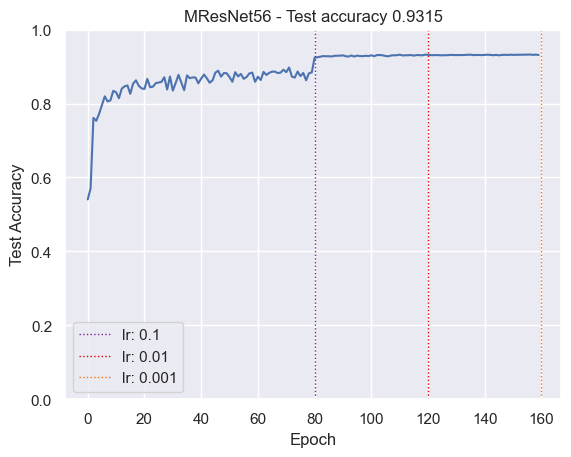

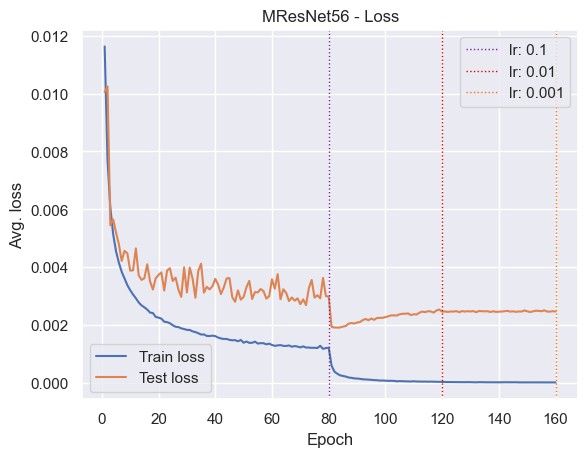

In [25]:
with open(p) as f:
    lines = f.read()

data = re.findall(
    r"Epoch (\d+) finished, average loss: (\d+\.\d+)\n[\d\- :\.]*\nStarting testing\n[\d\- :\.]*\nCorrect: \d+, total: \d+, accuracy: (\d+\.\d+), average loss: (\d+\.\d+)",
    lines,
    re.MULTILINE,
)
# print(len(data))
# print(data)
epochs = [int(x[0]) for x in data]
losses = [float(x[1]) for x in data]
accuracies = [float(x[2]) for x in data]
test_losses = [float(x[3]) for x in data]

results_mresnet56 = dict(epochs=epochs, losses=losses, accuracies=accuracies, test_losses=test_losses)

fix, ax = plt.subplots()
ax.plot(accuracies)
ax.set_ylim(0, 1)
plt.title(f"{model_name} - Test accuracy {accuracies[-1]:.4f}")
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
cmap = plt.get_cmap("Pastel1")

for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    
plt.legend()
plt.show()

fix, ax = plt.subplots()
train_loss, = ax.plot(epochs, losses, label="Train loss")
test_loss, = ax.plot(epochs, test_losses, label="Test loss")
plt.title(f"{model_name} - Loss")
plt.ylabel("Avg. loss")
plt.xlabel("Epoch")
first_legend = plt.legend(handles=[train_loss, test_loss])

ax = plt.gca().add_artist(first_legend)

lrhs = []
for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    lr_h = plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    lrhs.append(lr_h)

plt.legend(handles=lrhs)
plt.show()

In [26]:
with open(f"{model_name}_ks.txt", "w") as f:
    for i, x in enumerate(net.ks, start=1):
        f.write(f"{i},{x.item()}\n")

## LMResNet-110

In [27]:
batch_size = 128
trainloader, testloader = get_cifar10(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [28]:
from torchinfo import summary
from blocks import BasicBlock, Bottleneck
from MResNet import MResNet

In [29]:
net = MResNet(BasicBlock, [18,18,18], num_classes=10, stochastic_depth=False, pretrain=False)
net.cuda()
model_name = "MResNet110"

from pathlib import Path

p = Path(f"{model_name}.txt")
if p.exists():
    p.unlink()

summary(
    net,
    input_size=(batch_size, 3, 32, 32),
    col_names=[
        "input_size",
        "output_size",
        "num_params",
        "kernel_size",
        "mult_adds",
    ],
)

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
MResNet                                  [128, 3, 32, 32]          [128, 10]                 1,142                     --                        --
├─Conv2d: 1-1                            [128, 3, 32, 32]          [128, 16, 32, 32]         432                       [3, 3]                    56,623,104
├─ModuleList: 1-6                        --                        --                        (recursive)               --                        --
│    └─BasicBlock: 2-1                   [128, 16, 32, 32]         [128, 16, 32, 32]         --                        --                        --
│    │    └─BatchNorm2d: 3-1             [128, 16, 32, 32]         [128, 16, 32, 32]         32                        --                        4,096
│    │    └─ReLU: 3-2                    [128, 16, 32, 32]         [128, 16, 32, 32]         -

In [30]:
%%time
sgd_para = {"lr": 1e-3, "weight_decay": 0.0001, "momentum": 0.9}
lr_dict = {80: 0.1, 120: 0.01, 160: 0.001}

# Trainer = NN_SGDTrainer(net,sgd_para, trainloader, testloader, {200:1e-3}, model_name + '.txt')
Trainer = NN_SGDTrainer(
    net,
    sgd_para,
    trainloader,
    testloader,
    lr_dict,
    model_name + ".txt",
)

for i in range(160):  # 100
    Trainer.train()

391it [00:56,  6.88it/s]

Epoch 1 finished, average loss: 0.0116006892
Starting testing


Correct: 5374, total: 10000, accuracy: 0.5374000072, average loss: 0.0102425059


391it [00:57,  6.79it/s]

Epoch 2 finished, average loss: 0.0075245342
Starting testing


Correct: 7100, total: 10000, accuracy: 0.7099999785, average loss: 0.0066199029


391it [00:56,  6.92it/s]

Epoch 3 finished, average loss: 0.0059509991
Starting testing


Correct: 7357, total: 10000, accuracy: 0.7356999516, average loss: 0.0061515954


391it [00:56,  6.92it/s]

Epoch 4 finished, average loss: 0.0050549366
Starting testing


Correct: 7379, total: 10000, accuracy: 0.7378999591, average loss: 0.0059899610


391it [00:56,  6.87it/s]

Epoch 5 finished, average loss: 0.0045338519
Starting testing


Correct: 7951, total: 10000, accuracy: 0.7950999737, average loss: 0.0048397827


391it [00:57,  6.83it/s]

Epoch 6 finished, average loss: 0.0041252663
Starting testing


Correct: 7904, total: 10000, accuracy: 0.7903999686, average loss: 0.0048084939


391it [00:57,  6.79it/s]

Epoch 7 finished, average loss: 0.0037863892
Starting testing


Correct: 7966, total: 10000, accuracy: 0.7965999842, average loss: 0.0048338650


391it [00:56,  6.90it/s]

Epoch 8 finished, average loss: 0.0035145277
Starting testing


Correct: 8186, total: 10000, accuracy: 0.8185999990, average loss: 0.0041136671


391it [00:57,  6.81it/s]

Epoch 9 finished, average loss: 0.0033126870
Starting testing


Correct: 8114, total: 10000, accuracy: 0.8113999963, average loss: 0.0044005215


391it [00:57,  6.84it/s]

Epoch 10 finished, average loss: 0.0031390844
Starting testing


Correct: 8276, total: 10000, accuracy: 0.8276000023, average loss: 0.0040591798


391it [00:56,  6.88it/s]

Epoch 11 finished, average loss: 0.0029785391
Starting testing


Correct: 8362, total: 10000, accuracy: 0.8361999989, average loss: 0.0038905378


391it [00:57,  6.79it/s]

Epoch 12 finished, average loss: 0.0028670320
Starting testing


Correct: 8430, total: 10000, accuracy: 0.8429999948, average loss: 0.0036523556


391it [00:56,  6.90it/s]

Epoch 13 finished, average loss: 0.0027160014
Starting testing


Correct: 8386, total: 10000, accuracy: 0.8385999799, average loss: 0.0039865551


391it [00:56,  6.94it/s]

Epoch 14 finished, average loss: 0.0026101795
Starting testing


Correct: 8420, total: 10000, accuracy: 0.8420000076, average loss: 0.0036381929


391it [00:58,  6.73it/s]

Epoch 15 finished, average loss: 0.0025137447
Starting testing


Correct: 8549, total: 10000, accuracy: 0.8549000025, average loss: 0.0034964970


391it [00:57,  6.85it/s]

Epoch 16 finished, average loss: 0.0024121394
Starting testing


Correct: 8428, total: 10000, accuracy: 0.8427999616, average loss: 0.0036399522


391it [00:57,  6.77it/s]

Epoch 17 finished, average loss: 0.0023451283
Starting testing


Correct: 8449, total: 10000, accuracy: 0.8448999524, average loss: 0.0037780055


391it [00:56,  6.92it/s]

Epoch 18 finished, average loss: 0.0022547847
Starting testing


Correct: 8473, total: 10000, accuracy: 0.8472999930, average loss: 0.0036611986


391it [00:57,  6.83it/s]

Epoch 19 finished, average loss: 0.0022457736
Starting testing


Correct: 8580, total: 10000, accuracy: 0.8579999804, average loss: 0.0034338812


391it [00:57,  6.78it/s]

Epoch 20 finished, average loss: 0.0021232436
Starting testing


Correct: 8534, total: 10000, accuracy: 0.8533999920, average loss: 0.0035690516


391it [00:56,  6.88it/s]

Epoch 21 finished, average loss: 0.0020862773
Starting testing


Correct: 8652, total: 10000, accuracy: 0.8651999831, average loss: 0.0032492515


391it [00:57,  6.84it/s]

Epoch 22 finished, average loss: 0.0020143506
Starting testing


Correct: 8580, total: 10000, accuracy: 0.8579999804, average loss: 0.0034207486


391it [00:56,  6.90it/s]

Epoch 23 finished, average loss: 0.0020273709
Starting testing


Correct: 8579, total: 10000, accuracy: 0.8578999639, average loss: 0.0034309381


391it [00:55,  7.00it/s]

Epoch 24 finished, average loss: 0.0019597892
Starting testing


Correct: 8690, total: 10000, accuracy: 0.8689999580, average loss: 0.0032280850


391it [00:56,  6.98it/s]

Epoch 25 finished, average loss: 0.0019001625
Starting testing


Correct: 8625, total: 10000, accuracy: 0.8624999523, average loss: 0.0033394723


391it [00:55,  6.99it/s]

Epoch 26 finished, average loss: 0.0018532122
Starting testing


Correct: 8673, total: 10000, accuracy: 0.8672999740, average loss: 0.0032915193


391it [00:55,  6.99it/s]

Epoch 27 finished, average loss: 0.0018149651
Starting testing


Correct: 8787, total: 10000, accuracy: 0.8786999583, average loss: 0.0028934539


391it [00:56,  6.91it/s]

Epoch 28 finished, average loss: 0.0017647589
Starting testing


Correct: 8640, total: 10000, accuracy: 0.8639999628, average loss: 0.0033627526


391it [00:55,  6.99it/s]

Epoch 29 finished, average loss: 0.0017335247
Starting testing


Correct: 8758, total: 10000, accuracy: 0.8757999539, average loss: 0.0030772969


391it [00:56,  6.91it/s]

Epoch 30 finished, average loss: 0.0017210806
Starting testing


Correct: 8681, total: 10000, accuracy: 0.8680999875, average loss: 0.0032603117


391it [00:56,  6.97it/s]

Epoch 31 finished, average loss: 0.0016967455
Starting testing


Correct: 8759, total: 10000, accuracy: 0.8758999705, average loss: 0.0030556300


391it [00:56,  6.96it/s]

Epoch 32 finished, average loss: 0.0016714533
Starting testing


Correct: 8720, total: 10000, accuracy: 0.8719999790, average loss: 0.0032468469


391it [00:55,  7.03it/s]

Epoch 33 finished, average loss: 0.0015920225
Starting testing


Correct: 8702, total: 10000, accuracy: 0.8701999784, average loss: 0.0033116601


391it [00:55,  7.07it/s]

Epoch 34 finished, average loss: 0.0016321031
Starting testing


Correct: 8705, total: 10000, accuracy: 0.8704999685, average loss: 0.0030866430


391it [00:55,  7.07it/s]

Epoch 35 finished, average loss: 0.0015984408
Starting testing


Correct: 8779, total: 10000, accuracy: 0.8779000044, average loss: 0.0029860807


391it [00:55,  7.04it/s]

Epoch 36 finished, average loss: 0.0015677558
Starting testing


Correct: 8728, total: 10000, accuracy: 0.8727999926, average loss: 0.0031486361


391it [00:55,  7.03it/s]

Epoch 37 finished, average loss: 0.0015221783
Starting testing


Correct: 8603, total: 10000, accuracy: 0.8603000045, average loss: 0.0035437294


391it [00:55,  6.98it/s]

Epoch 38 finished, average loss: 0.0015158318
Starting testing


Correct: 8856, total: 10000, accuracy: 0.8855999708, average loss: 0.0027909981


391it [00:55,  7.00it/s]

Epoch 39 finished, average loss: 0.0014861988
Starting testing


Correct: 8716, total: 10000, accuracy: 0.8715999722, average loss: 0.0033281545


391it [00:55,  7.04it/s]

Epoch 40 finished, average loss: 0.0014513081
Starting testing


Correct: 8781, total: 10000, accuracy: 0.8780999780, average loss: 0.0030224321


391it [00:55,  7.08it/s]

Epoch 41 finished, average loss: 0.0014823819
Starting testing


Correct: 8751, total: 10000, accuracy: 0.8750999570, average loss: 0.0031065229


391it [00:55,  7.07it/s]

Epoch 42 finished, average loss: 0.0014354230
Starting testing


Correct: 8855, total: 10000, accuracy: 0.8854999542, average loss: 0.0028968430


391it [00:53,  7.31it/s]

Epoch 43 finished, average loss: 0.0014429764
Starting testing


Correct: 8834, total: 10000, accuracy: 0.8833999634, average loss: 0.0029235553


391it [00:52,  7.39it/s]

Epoch 44 finished, average loss: 0.0013533875
Starting testing


Correct: 8744, total: 10000, accuracy: 0.8743999600, average loss: 0.0030621019


391it [00:52,  7.40it/s]

Epoch 45 finished, average loss: 0.0013649941
Starting testing


Correct: 8825, total: 10000, accuracy: 0.8824999928, average loss: 0.0028494528


391it [00:52,  7.39it/s]

Epoch 46 finished, average loss: 0.0013547743
Starting testing


Correct: 8655, total: 10000, accuracy: 0.8654999733, average loss: 0.0032558209


391it [00:52,  7.40it/s]

Epoch 47 finished, average loss: 0.0013387474
Starting testing


Correct: 8894, total: 10000, accuracy: 0.8894000053, average loss: 0.0026751723


391it [00:52,  7.40it/s]

Epoch 48 finished, average loss: 0.0013496010
Starting testing


Correct: 8697, total: 10000, accuracy: 0.8696999550, average loss: 0.0032379007


391it [00:52,  7.39it/s]

Epoch 49 finished, average loss: 0.0012902840
Starting testing


Correct: 8839, total: 10000, accuracy: 0.8838999867, average loss: 0.0029817283


391it [00:52,  7.40it/s]

Epoch 50 finished, average loss: 0.0013237302
Starting testing


Correct: 8803, total: 10000, accuracy: 0.8802999854, average loss: 0.0031147892


391it [00:53,  7.37it/s]

Epoch 51 finished, average loss: 0.0012940093
Starting testing


Correct: 8346, total: 10000, accuracy: 0.8345999718, average loss: 0.0047168064


391it [00:52,  7.39it/s]

Epoch 52 finished, average loss: 0.0012983136
Starting testing


Correct: 8774, total: 10000, accuracy: 0.8773999810, average loss: 0.0033899660


391it [00:52,  7.40it/s]

Epoch 53 finished, average loss: 0.0012825839
Starting testing


Correct: 8668, total: 10000, accuracy: 0.8667999506, average loss: 0.0033737823


391it [00:52,  7.38it/s]

Epoch 54 finished, average loss: 0.0012526002
Starting testing


Correct: 8859, total: 10000, accuracy: 0.8858999610, average loss: 0.0030702234


391it [00:52,  7.39it/s]

Epoch 55 finished, average loss: 0.0012540407
Starting testing


Correct: 8928, total: 10000, accuracy: 0.8927999735, average loss: 0.0027364961


391it [00:52,  7.40it/s]

Epoch 56 finished, average loss: 0.0012202319
Starting testing


Correct: 8751, total: 10000, accuracy: 0.8750999570, average loss: 0.0032134967


391it [00:52,  7.39it/s]

Epoch 57 finished, average loss: 0.0012275457
Starting testing


Correct: 8761, total: 10000, accuracy: 0.8761000037, average loss: 0.0031867401


391it [00:52,  7.39it/s]

Epoch 58 finished, average loss: 0.0011985838
Starting testing


Correct: 8877, total: 10000, accuracy: 0.8876999617, average loss: 0.0029403114


391it [00:52,  7.39it/s]

Epoch 59 finished, average loss: 0.0011848146
Starting testing


Correct: 8832, total: 10000, accuracy: 0.8831999898, average loss: 0.0030598798


391it [00:52,  7.39it/s]

Epoch 60 finished, average loss: 0.0012093524
Starting testing


Correct: 8722, total: 10000, accuracy: 0.8721999526, average loss: 0.0033036834


391it [00:52,  7.40it/s]

Epoch 61 finished, average loss: 0.0012116325
Starting testing


Correct: 8713, total: 10000, accuracy: 0.8712999821, average loss: 0.0034933253


391it [00:52,  7.40it/s]

Epoch 62 finished, average loss: 0.0011766200
Starting testing


Correct: 8931, total: 10000, accuracy: 0.8930999637, average loss: 0.0026334774


391it [00:52,  7.41it/s]

Epoch 63 finished, average loss: 0.0012104476
Starting testing


Correct: 8865, total: 10000, accuracy: 0.8865000010, average loss: 0.0028275616


391it [00:52,  7.39it/s]

Epoch 64 finished, average loss: 0.0011554568
Starting testing


Correct: 8890, total: 10000, accuracy: 0.8889999986, average loss: 0.0028246557


391it [00:55,  7.03it/s]

Epoch 65 finished, average loss: 0.0011885995
Starting testing


Correct: 8962, total: 10000, accuracy: 0.8962000012, average loss: 0.0026508054


391it [00:56,  6.91it/s]

Epoch 66 finished, average loss: 0.0011431986
Starting testing


Correct: 8830, total: 10000, accuracy: 0.8829999566, average loss: 0.0031331408


391it [00:56,  6.94it/s]

Epoch 67 finished, average loss: 0.0011693796
Starting testing


Correct: 8674, total: 10000, accuracy: 0.8673999906, average loss: 0.0034047985


391it [00:56,  6.90it/s]

Epoch 68 finished, average loss: 0.0011237724
Starting testing


Correct: 8897, total: 10000, accuracy: 0.8896999955, average loss: 0.0030387068


391it [00:56,  6.87it/s]

Epoch 69 finished, average loss: 0.0011451875
Starting testing


Correct: 8969, total: 10000, accuracy: 0.8968999982, average loss: 0.0025783640


391it [00:55,  7.02it/s]

Epoch 70 finished, average loss: 0.0011053532
Starting testing


Correct: 8837, total: 10000, accuracy: 0.8836999536, average loss: 0.0030416263


391it [01:00,  6.50it/s]

Epoch 71 finished, average loss: 0.0011309245
Starting testing


Correct: 8867, total: 10000, accuracy: 0.8866999745, average loss: 0.0028466119


391it [01:01,  6.39it/s]

Epoch 72 finished, average loss: 0.0011083231
Starting testing


Correct: 8940, total: 10000, accuracy: 0.8939999938, average loss: 0.0027858073


391it [01:00,  6.47it/s]

Epoch 73 finished, average loss: 0.0011314218
Starting testing


Correct: 8903, total: 10000, accuracy: 0.8902999759, average loss: 0.0029368022


391it [01:02,  6.24it/s]

Epoch 74 finished, average loss: 0.0011117570
Starting testing


Correct: 8984, total: 10000, accuracy: 0.8983999491, average loss: 0.0026175294


391it [01:03,  6.19it/s]

Epoch 75 finished, average loss: 0.0010581135
Starting testing


Correct: 8841, total: 10000, accuracy: 0.8840999603, average loss: 0.0030250567


391it [01:01,  6.38it/s]

Epoch 76 finished, average loss: 0.0010914871
Starting testing


Correct: 9003, total: 10000, accuracy: 0.9002999663, average loss: 0.0026130103


391it [01:00,  6.42it/s]

Epoch 77 finished, average loss: 0.0010482526
Starting testing


Correct: 8906, total: 10000, accuracy: 0.8905999660, average loss: 0.0028149450


391it [01:00,  6.43it/s]

Epoch 78 finished, average loss: 0.0010721628
Starting testing


Correct: 8814, total: 10000, accuracy: 0.8813999891, average loss: 0.0030309427


391it [01:00,  6.42it/s]

Epoch 79 finished, average loss: 0.0010450833
Starting testing


Correct: 8952, total: 10000, accuracy: 0.8951999545, average loss: 0.0028182051


391it [01:00,  6.41it/s]

Epoch 80 finished, average loss: 0.0010711138
Starting testing


Correct: 8947, total: 10000, accuracy: 0.8946999907, average loss: 0.0027345031


391it [01:01,  6.41it/s]

Epoch 81 finished, average loss: 0.0005130068
Starting testing


Correct: 9280, total: 10000, accuracy: 0.9279999733, average loss: 0.0018465894


391it [01:00,  6.41it/s]

Epoch 82 finished, average loss: 0.0002865937
Starting testing


Correct: 9297, total: 10000, accuracy: 0.9296999574, average loss: 0.0018547211


391it [01:01,  6.39it/s]

Epoch 83 finished, average loss: 0.0002284939
Starting testing


Correct: 9319, total: 10000, accuracy: 0.9318999648, average loss: 0.0018693737


391it [01:00,  6.43it/s]

Epoch 84 finished, average loss: 0.0001947687
Starting testing


Correct: 9318, total: 10000, accuracy: 0.9317999482, average loss: 0.0018861775


391it [01:00,  6.52it/s]

Epoch 85 finished, average loss: 0.0001631341
Starting testing


Correct: 9312, total: 10000, accuracy: 0.9311999679, average loss: 0.0019326845


391it [01:00,  6.51it/s]

Epoch 86 finished, average loss: 0.0001414105
Starting testing


Correct: 9332, total: 10000, accuracy: 0.9332000017, average loss: 0.0019597082


391it [01:00,  6.51it/s]

Epoch 87 finished, average loss: 0.0001322660
Starting testing


Correct: 9325, total: 10000, accuracy: 0.9325000048, average loss: 0.0019781501


391it [01:00,  6.49it/s]

Epoch 88 finished, average loss: 0.0001129786
Starting testing


Correct: 9312, total: 10000, accuracy: 0.9311999679, average loss: 0.0020376839


391it [00:59,  6.52it/s]

Epoch 89 finished, average loss: 0.0000993691
Starting testing


Correct: 9329, total: 10000, accuracy: 0.9328999519, average loss: 0.0020446528


391it [01:00,  6.51it/s]

Epoch 90 finished, average loss: 0.0000968116
Starting testing


Correct: 9328, total: 10000, accuracy: 0.9327999949, average loss: 0.0020822407


391it [00:59,  6.53it/s]

Epoch 91 finished, average loss: 0.0000869217
Starting testing


Correct: 9334, total: 10000, accuracy: 0.9333999753, average loss: 0.0021098664


391it [01:00,  6.50it/s]

Epoch 92 finished, average loss: 0.0000727270
Starting testing


Correct: 9346, total: 10000, accuracy: 0.9345999956, average loss: 0.0021041011


391it [01:00,  6.51it/s]

Epoch 93 finished, average loss: 0.0000696071
Starting testing


Correct: 9326, total: 10000, accuracy: 0.9325999618, average loss: 0.0021670650


391it [01:00,  6.50it/s]

Epoch 94 finished, average loss: 0.0000625601
Starting testing


Correct: 9346, total: 10000, accuracy: 0.9345999956, average loss: 0.0021469798


391it [01:00,  6.50it/s]

Epoch 95 finished, average loss: 0.0000623671
Starting testing


Correct: 9340, total: 10000, accuracy: 0.9339999557, average loss: 0.0021766244


391it [01:00,  6.50it/s]

Epoch 96 finished, average loss: 0.0000559796
Starting testing


Correct: 9348, total: 10000, accuracy: 0.9347999692, average loss: 0.0022161291


391it [01:00,  6.50it/s]

Epoch 97 finished, average loss: 0.0000548221
Starting testing


Correct: 9356, total: 10000, accuracy: 0.9355999827, average loss: 0.0022187067


391it [01:00,  6.48it/s]

Epoch 98 finished, average loss: 0.0000490862
Starting testing


Correct: 9344, total: 10000, accuracy: 0.9343999624, average loss: 0.0022349506


391it [01:00,  6.51it/s]

Epoch 99 finished, average loss: 0.0000475139
Starting testing


Correct: 9352, total: 10000, accuracy: 0.9351999760, average loss: 0.0022394256


391it [01:00,  6.50it/s]

Epoch 100 finished, average loss: 0.0000510282
Starting testing


Correct: 9348, total: 10000, accuracy: 0.9347999692, average loss: 0.0022700326


391it [01:00,  6.49it/s]

Epoch 101 finished, average loss: 0.0000396392
Starting testing


Correct: 9352, total: 10000, accuracy: 0.9351999760, average loss: 0.0022756067


391it [01:00,  6.50it/s]

Epoch 102 finished, average loss: 0.0000409725
Starting testing


Correct: 9339, total: 10000, accuracy: 0.9338999987, average loss: 0.0022956628


391it [00:59,  6.52it/s]

Epoch 103 finished, average loss: 0.0000378806
Starting testing


Correct: 9334, total: 10000, accuracy: 0.9333999753, average loss: 0.0023596412


391it [01:00,  6.49it/s]

Epoch 104 finished, average loss: 0.0000355478
Starting testing


Correct: 9328, total: 10000, accuracy: 0.9327999949, average loss: 0.0023817453


391it [01:00,  6.43it/s]

Epoch 105 finished, average loss: 0.0000381146
Starting testing


Correct: 9344, total: 10000, accuracy: 0.9343999624, average loss: 0.0023581432


391it [01:01,  6.41it/s]

Epoch 106 finished, average loss: 0.0000328429
Starting testing


Correct: 9340, total: 10000, accuracy: 0.9339999557, average loss: 0.0023606629


391it [01:01,  6.40it/s]

Epoch 107 finished, average loss: 0.0000330295
Starting testing


Correct: 9353, total: 10000, accuracy: 0.9352999926, average loss: 0.0023609574


391it [01:01,  6.40it/s]

Epoch 108 finished, average loss: 0.0000315514
Starting testing


Correct: 9353, total: 10000, accuracy: 0.9352999926, average loss: 0.0023972172


391it [01:01,  6.35it/s]

Epoch 109 finished, average loss: 0.0000326983
Starting testing


Correct: 9338, total: 10000, accuracy: 0.9337999821, average loss: 0.0023913890


391it [01:01,  6.34it/s]

Epoch 110 finished, average loss: 0.0000313576
Starting testing


Correct: 9350, total: 10000, accuracy: 0.9350000024, average loss: 0.0023666321


391it [01:01,  6.35it/s]

Epoch 111 finished, average loss: 0.0000297538
Starting testing


Correct: 9359, total: 10000, accuracy: 0.9358999729, average loss: 0.0023884038


391it [01:01,  6.37it/s]

Epoch 112 finished, average loss: 0.0000274187
Starting testing


Correct: 9349, total: 10000, accuracy: 0.9348999858, average loss: 0.0024165555


391it [01:01,  6.37it/s]


Epoch 113 finished, average loss: 0.0000267206
Starting testing
Correct: 9352, total: 10000, accuracy: 0.9351999760, average loss: 0.0023955393


391it [01:01,  6.33it/s]

Epoch 114 finished, average loss: 0.0000297957
Starting testing


Correct: 9333, total: 10000, accuracy: 0.9332999587, average loss: 0.0024758913


391it [00:59,  6.59it/s]

Epoch 115 finished, average loss: 0.0000243856
Starting testing


Correct: 9342, total: 10000, accuracy: 0.9341999888, average loss: 0.0024652680


391it [00:56,  6.88it/s]

Epoch 116 finished, average loss: 0.0000235324
Starting testing


Correct: 9373, total: 10000, accuracy: 0.9372999668, average loss: 0.0024036104


391it [00:57,  6.81it/s]

Epoch 117 finished, average loss: 0.0000222548
Starting testing


Correct: 9349, total: 10000, accuracy: 0.9348999858, average loss: 0.0024918683


391it [00:57,  6.78it/s]

Epoch 118 finished, average loss: 0.0000248698
Starting testing


Correct: 9345, total: 10000, accuracy: 0.9344999790, average loss: 0.0024333018


391it [01:00,  6.42it/s]

Epoch 119 finished, average loss: 0.0000239134
Starting testing


Correct: 9330, total: 10000, accuracy: 0.9329999685, average loss: 0.0025340195


391it [00:59,  6.62it/s]

Epoch 120 finished, average loss: 0.0000265974
Starting testing


Correct: 9346, total: 10000, accuracy: 0.9345999956, average loss: 0.0024588493


391it [00:59,  6.57it/s]

Epoch 121 finished, average loss: 0.0000220932
Starting testing


Correct: 9346, total: 10000, accuracy: 0.9345999956, average loss: 0.0024505429


391it [01:00,  6.47it/s]

Epoch 122 finished, average loss: 0.0000212986
Starting testing


Correct: 9335, total: 10000, accuracy: 0.9334999919, average loss: 0.0024323911


391it [00:57,  6.81it/s]

Epoch 123 finished, average loss: 0.0000194443
Starting testing


Correct: 9335, total: 10000, accuracy: 0.9334999919, average loss: 0.0024440827


391it [00:56,  6.93it/s]

Epoch 124 finished, average loss: 0.0000206012
Starting testing


Correct: 9347, total: 10000, accuracy: 0.9346999526, average loss: 0.0024179639


391it [00:56,  6.94it/s]

Epoch 125 finished, average loss: 0.0000177590
Starting testing


Correct: 9346, total: 10000, accuracy: 0.9345999956, average loss: 0.0024195352


391it [00:55,  7.03it/s]

Epoch 126 finished, average loss: 0.0000181443
Starting testing


Correct: 9346, total: 10000, accuracy: 0.9345999956, average loss: 0.0024235241


391it [00:55,  7.04it/s]

Epoch 127 finished, average loss: 0.0000170684
Starting testing


Correct: 9350, total: 10000, accuracy: 0.9350000024, average loss: 0.0024565097


391it [00:54,  7.18it/s]

Epoch 128 finished, average loss: 0.0000174475
Starting testing


Correct: 9354, total: 10000, accuracy: 0.9353999496, average loss: 0.0024274666


391it [00:54,  7.18it/s]

Epoch 129 finished, average loss: 0.0000177513
Starting testing


Correct: 9357, total: 10000, accuracy: 0.9356999993, average loss: 0.0024377423


391it [00:54,  7.15it/s]

Epoch 130 finished, average loss: 0.0000180306
Starting testing


Correct: 9344, total: 10000, accuracy: 0.9343999624, average loss: 0.0024461429


391it [00:54,  7.14it/s]

Epoch 131 finished, average loss: 0.0000155758
Starting testing


Correct: 9346, total: 10000, accuracy: 0.9345999956, average loss: 0.0024307983


391it [00:54,  7.13it/s]

Epoch 132 finished, average loss: 0.0000176971
Starting testing


Correct: 9340, total: 10000, accuracy: 0.9339999557, average loss: 0.0024190352


391it [00:55,  7.08it/s]

Epoch 133 finished, average loss: 0.0000166970
Starting testing


Correct: 9351, total: 10000, accuracy: 0.9350999594, average loss: 0.0024411506


391it [00:55,  7.08it/s]

Epoch 134 finished, average loss: 0.0000178077
Starting testing


Correct: 9352, total: 10000, accuracy: 0.9351999760, average loss: 0.0024320248


391it [00:55,  7.10it/s]

Epoch 135 finished, average loss: 0.0000190255
Starting testing


Correct: 9348, total: 10000, accuracy: 0.9347999692, average loss: 0.0024164221


391it [00:55,  7.08it/s]

Epoch 136 finished, average loss: 0.0000166078
Starting testing


Correct: 9359, total: 10000, accuracy: 0.9358999729, average loss: 0.0024345479


391it [00:54,  7.16it/s]

Epoch 137 finished, average loss: 0.0000169270
Starting testing


Correct: 9354, total: 10000, accuracy: 0.9353999496, average loss: 0.0024039189


391it [00:53,  7.37it/s]

Epoch 138 finished, average loss: 0.0000147026
Starting testing


Correct: 9355, total: 10000, accuracy: 0.9354999661, average loss: 0.0024166848


391it [00:53,  7.38it/s]

Epoch 139 finished, average loss: 0.0000157017
Starting testing


Correct: 9354, total: 10000, accuracy: 0.9353999496, average loss: 0.0024377584


391it [00:53,  7.38it/s]

Epoch 140 finished, average loss: 0.0000142515
Starting testing


Correct: 9356, total: 10000, accuracy: 0.9355999827, average loss: 0.0024313601


391it [00:52,  7.38it/s]

Epoch 141 finished, average loss: 0.0000159054
Starting testing


Correct: 9356, total: 10000, accuracy: 0.9355999827, average loss: 0.0024521041


391it [00:53,  7.36it/s]

Epoch 142 finished, average loss: 0.0000156094
Starting testing


Correct: 9350, total: 10000, accuracy: 0.9350000024, average loss: 0.0024147797


391it [00:53,  7.37it/s]

Epoch 143 finished, average loss: 0.0000134900
Starting testing


Correct: 9348, total: 10000, accuracy: 0.9347999692, average loss: 0.0024402376


391it [00:52,  7.38it/s]

Epoch 144 finished, average loss: 0.0000148263
Starting testing


Correct: 9345, total: 10000, accuracy: 0.9344999790, average loss: 0.0024332072


391it [00:52,  7.40it/s]

Epoch 145 finished, average loss: 0.0000132960
Starting testing


Correct: 9343, total: 10000, accuracy: 0.9343000054, average loss: 0.0024605397


391it [00:52,  7.38it/s]

Epoch 146 finished, average loss: 0.0000139723
Starting testing


Correct: 9360, total: 10000, accuracy: 0.9359999895, average loss: 0.0024660264


391it [00:52,  7.39it/s]

Epoch 147 finished, average loss: 0.0000125158
Starting testing


Correct: 9361, total: 10000, accuracy: 0.9361000061, average loss: 0.0024592647


391it [00:53,  7.35it/s]

Epoch 148 finished, average loss: 0.0000135610
Starting testing


Correct: 9341, total: 10000, accuracy: 0.9340999722, average loss: 0.0024540509


391it [00:52,  7.40it/s]

Epoch 149 finished, average loss: 0.0000149512
Starting testing


Correct: 9357, total: 10000, accuracy: 0.9356999993, average loss: 0.0024532481


391it [00:52,  7.39it/s]

Epoch 150 finished, average loss: 0.0000122562
Starting testing


Correct: 9348, total: 10000, accuracy: 0.9347999692, average loss: 0.0024306110


391it [00:52,  7.39it/s]

Epoch 151 finished, average loss: 0.0000158292
Starting testing


Correct: 9345, total: 10000, accuracy: 0.9344999790, average loss: 0.0024529553


391it [00:53,  7.37it/s]

Epoch 152 finished, average loss: 0.0000135482
Starting testing


Correct: 9357, total: 10000, accuracy: 0.9356999993, average loss: 0.0024785536


391it [00:53,  7.37it/s]

Epoch 153 finished, average loss: 0.0000128449
Starting testing


Correct: 9364, total: 10000, accuracy: 0.9363999963, average loss: 0.0024968176


391it [00:52,  7.40it/s]

Epoch 154 finished, average loss: 0.0000125113
Starting testing


Correct: 9351, total: 10000, accuracy: 0.9350999594, average loss: 0.0024590254


391it [00:52,  7.40it/s]

Epoch 155 finished, average loss: 0.0000144442
Starting testing


Correct: 9358, total: 10000, accuracy: 0.9357999563, average loss: 0.0024666845


391it [00:52,  7.39it/s]

Epoch 156 finished, average loss: 0.0000128274
Starting testing


Correct: 9349, total: 10000, accuracy: 0.9348999858, average loss: 0.0024485769


391it [00:52,  7.40it/s]

Epoch 157 finished, average loss: 0.0000129358
Starting testing


Correct: 9358, total: 10000, accuracy: 0.9357999563, average loss: 0.0024402378


391it [00:52,  7.38it/s]

Epoch 158 finished, average loss: 0.0000134810
Starting testing


Correct: 9347, total: 10000, accuracy: 0.9346999526, average loss: 0.0024657413


391it [00:53,  7.37it/s]

Epoch 159 finished, average loss: 0.0000121930
Starting testing


Correct: 9356, total: 10000, accuracy: 0.9355999827, average loss: 0.0024620814


391it [00:52,  7.39it/s]

Epoch 160 finished, average loss: 0.0000133403
Starting testing


Correct: 9357, total: 10000, accuracy: 0.9356999993, average loss: 0.0024752500
CPU times: user 1h 54min 59s, sys: 44min 30s, total: 2h 39min 29s
Wall time: 2h 41min 13s


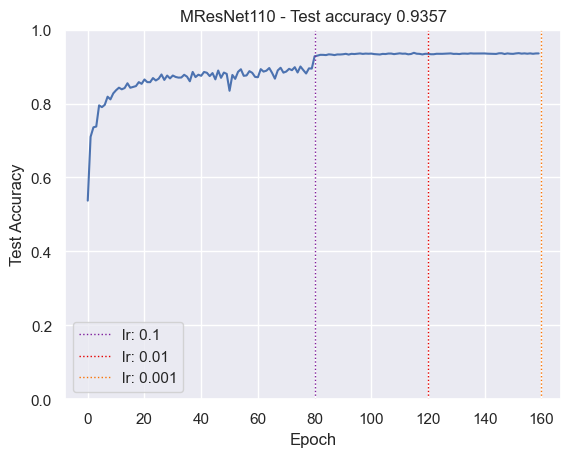

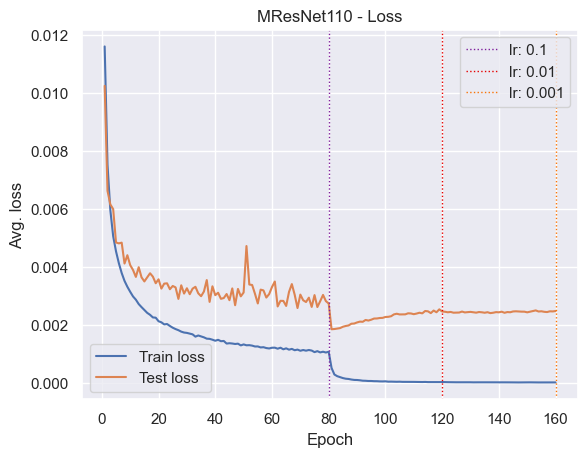

In [31]:
with open(p) as f:
    lines = f.read()

data = re.findall(
    r"Epoch (\d+) finished, average loss: (\d+\.\d+)\n[\d\- :\.]*\nStarting testing\n[\d\- :\.]*\nCorrect: \d+, total: \d+, accuracy: (\d+\.\d+), average loss: (\d+\.\d+)",
    lines,
    re.MULTILINE,
)
# print(len(data))
# print(data)
epochs = [int(x[0]) for x in data]
losses = [float(x[1]) for x in data]
accuracies = [float(x[2]) for x in data]
test_losses = [float(x[3]) for x in data]

results_mresnet110 = dict(epochs=epochs, losses=losses, accuracies=accuracies, test_losses=test_losses)

fix, ax = plt.subplots()
ax.plot(accuracies)
ax.set_ylim(0, 1)
plt.title(f"{model_name} - Test accuracy {accuracies[-1]:.4f}")
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
cmap = plt.get_cmap("Pastel1")

for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    
plt.legend()
plt.show()

fix, ax = plt.subplots()
train_loss, = ax.plot(epochs, losses, label="Train loss")
test_loss, = ax.plot(epochs, test_losses, label="Test loss")
plt.title(f"{model_name} - Loss")
plt.ylabel("Avg. loss")
plt.xlabel("Epoch")
first_legend = plt.legend(handles=[train_loss, test_loss])

ax = plt.gca().add_artist(first_legend)

lrhs = []
for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    lr_h = plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    lrhs.append(lr_h)

plt.legend(handles=lrhs)
plt.show()

In [32]:
with open(f"{model_name}_ks.txt", "w") as f:
    for i, x in enumerate(net.ks, start=1):
        f.write(f"{i},{x.item()}\n")